# Projekt Bootcamp

Grzegorz Bies, Katowice grupa 2

## Dane

Dane pochodzą z Hackatonu ING o nazwie  "Lion’s Den ING Modeling Challenge 2018"
Zawierając informacje z wniosku aplikacyjnego z aplikacji kredytowej, w latach 2014 - 2017. Każdy wniosek kredytowy zakończył się pozytywną decyzją kredytową. 


## CEL PROJEKTU

Przewidywanie na podstawie dostępnych w wniosku kredytowym danych, którzy klienci nie spłacą zobowiązania kredytowego.
Zostanie zbudowany model klasyfikacji zmiennej DEFAULT_RATE - zgodnie z definicją opisuje którzy klienci nie wykonali zobowiązania w ciągu najbliższych 12 miesięcy od udzielenia kredytu

In [1]:
# Sekcja IMPORT
import pandas as pd
import numpy  as np
import math

# wykresy
import matplotlib.pyplot as plt
import seaborn as sns

# SKLEARN
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.metrics import precision_score

# selekcja rekusywna (wylicza i wraca) (rekursywna selekcja cech )
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import metrics

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, mean_squared_error
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesRegressor


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# Aby dziedziczyc po klasach do tworzenia imputerow, pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import make_pipeline
from sklearn.base import TransformerMixin, BaseEstimator

#import category_encoders as ce - najpierw zainstalowac
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# XGBOOST
from xgboost.sklearn import XGBClassifier

# ustawiam opcje wyświetlania całego tekstu w DataFrame (na potrzeby tego projektu - wyświetlenie opisu danych)
pd.set_option('display.max_colwidth', -1)
# ustawiam wyświetlanie wszystkich kolumn 
pd.set_option('display.max_columns', None)

# COLAB
#from google.colab import drive 
#drive.mount('/content/gdrive')

## Import danych aplikacyjnych do z pliku oraz opisu zmiennych

Opis zmiennych - plik XLSX <br>
**Lion's Den** -> opis zmiennych <br><br>


In [2]:
macro_opis = pd.read_excel(r'Variable_description.xlsx', sheet_name="Lion'sDen") 
# COLAB
# macro_opis = pd.read_excel('gdrive/My Drive/Colab Notebooks/Variable_description.xlsx', sheet_name="Lion'sDen") 

macro_opis[['NAME','OPIS']]

,NAME,OPIS
0,CUSTOMER_ID,Identyfikator klienta
1,APPLICATION_ID,Identyfikator aplikacji
2,DEFAULT_FLAG,"Flaga defaultu, w której wartość 1 oznacza, że klient w ciągu pierwszych 12 miesięcy przestał spłacać kredyt o który aplikował, a wartość 0, że klient spłacał regularnie swoje zobowiązanie"
3,APPLICATION_DATE,Data złożenia aplikacji
4,APPLICATION_HOUR,Godzina złożenia aplikacji (7-24 lub 1-6)
5,APPLICATION_WEEKDAY,Dzień tygodnia złożenia aplikacji
6,APPLICATION_MONTH,Miesiąc złożenia aplikacji
7,APPLICATION_YEAR,Rok złożenia aplikacji
8,PRODUCT_GROUP,"Aplikacja dotyczy produktu z grupy produktowej (CASH LOAN, OVERDRAFT, CREDIT CARD)"
9,LOAN_PERIOD,Okres kredytowania (0 oznacza aplikację o produkt z limitem: CREDIT CARD lub OVERDRAFT)


Na podglądzie pliku sprawdziłem seperator, którym jest średnik.<br>
Dodatkowo wartości dziesiętne są seperowane ','<br>
Pierwotnie bez użycia parametru decimal zmienne **APPLICATION_ID**, **DECLARED_EXPEDITURES**, **CREDIT_BALANCE_TO_LIMIT** nie zostały prawidłowo zaczytane


In [3]:
# Na podglądzie pliku sprawdziłem seperator, którym jest średnik. Dodatkowo wartości dziesiętne są seperowane ','
# Pierwotnie bez użycia parametru decimal zmienne APPLICATION_ID,DECLARED_EXPEDITURES,CREDIT_BALANCE_TO_LIMIT nie zostały prawidłowo zaczyna 

df_base = pd.read_csv('LionsDen.csv', delimiter =';', decimal= ',')
# COLAB
# df_base = pd.read_csv('gdrive/My Drive/Colab Notebooks/LionsDen.csv', delimiter =';', decimal= ',')

Weryfikuje wstępnie proces zaczytania danych

In [4]:
df_base.shape

(79155, 50)

In [5]:
df_base.head(5)

,CUSTOMER_ID,APPLICATION_ID,DEFAULT_FLAG,APPLICATION_DATE,APPLICATION_HOUR,APPLICATION_WEEKDAY,APPLICATION_MONTH,APPLICATION_YEAR,PRODUCT_GROUP,LOAN_PERIOD,CREDIT_AMOUNT,CUSTOMER_TYPE,COOP_PERIOD,CREDIT_COOP_PERIOD,AGE,AGE_BANDS,EDUCATION,MARITAL_STATUS,SPOUSE_PROPERTY_STATUS,OWNERSHIP,NUMBER_OF_FAMILY_MEMBERS,MAIL_ADDR_SAME_AS_RESIDENTIAL,EMAIL_DOMAIN,EMAIL_NAME_SURNAME,MARKETING_CONSENT,EMP_TYPE,SENIORITY,CUSTOMER_RUNNING_A_BUSINESS,REMUNERATION_PAID_BY_CASH,REMUNERATION_PAID_TO_ING,DECLARED_INCOME,INCOME_3M,DECLARED_EXPEDITURES,NO_INFLOWS,NO_NONCASH_CHARGES,NO_CASH_CHARGES,SAVING_BALANCE,CREDIT_BALANCE,CREDIT_BALANCE_TO_LIMIT,DUE_AMOUNT,DPD,DPD_FALL_IN_12M,BIK_NUM_REQ_TOTAL_LZ3,BIK_NUM_REQ_TOTAL_LZ4_12,BIK_GRP,BIK_ACC_NUM_TOTAL_CLOSE,BIK_ACC_NUM_TOTAL_OPEN,BIK_BAL_TOTAL_OPEN,BIK_OVERDUE_12M_TOTAL_MAX,BIK_OVERDUE_EVER_TOTAL_MAX
0,102528122,3.620000e+11,0,2017-05-10,24-lip,3,5,2017,CASH LOAN,96,4200,EXISTING,44,34,29,25-29,Higher,Single,N,Renter (from private person),1,N,GMAIL.COM,ONLY SURNAME,Y,Permanent Job Agreement,12,N,N,Y,3970,10100.0,1071.83,6.0,22.0,16.0,0.0,19140.0,0.913025,0.0,0.0,4.0,2,3,CREDIT HISTORY (FULL DATA),5.0,9.0,19250.0,0.0,0.0
1,146634735,6.360000e+11,0,2016-01-09,24-lip,7,1,2016,CASH LOAN,36,11100,EXISTING,52,39,25,25-29,Higher,Single,N,Living with parents,1,N,WP.PL,ONLY SURNAME,Y,Permanent Job Agreement,19,N,N,Y,5580,7200.0,1080.00,8.0,8.0,68.0,NaN,NaN,NaN,NaN,NaN,8.0,2,2,CREDIT HISTORY (FULL DATA),1.0,2.0,10950.0,0.0,3244.0
2,996453767,6.950000e+11,0,2016-07-07,24-lip,5,7,2016,OVERDRAFT,0,800,EXISTING,147,25,43,40-49,Vocational,Married,N,Other,3,Y,O2.PL,ONLY NAME,Y,Term Job Agreement,48,N,N,Y,2090,4700.0,882.74,4.0,4.0,76.0,0.0,NaN,NaN,NaN,NaN,1.0,1,0,CREDIT HISTORY (FULL DATA),3.0,1.0,4650.0,67.0,67.0
3,816020174,9.890000e+11,0,2016-07-20,24-lip,3,7,2016,CASH LOAN,36,5900,EXISTING,73,27,25,25-29,Higher,Single,N,Living with parents,1,Y,GMAIL.COM,LACK OF NAME/SURNAME,Y,Term Job Agreement,24,Y,N,Y,2580,14600.0,940.00,6.0,12.0,29.0,NaN,32360.0,0.950608,0.0,0.0,10.0,1,18,CREDIT HISTORY (FULL DATA),7.0,5.0,33300.0,0.0,1.0
4,930630805,7.790630e+10,0,2015-06-30,24-lip,3,6,2015,CASH LOAN,5,1400,EXISTING,82,28,30,30-39,Higher,Single,N,Living with parents,1,Y,OTHER,ONLY SURNAME,Y,Permanent Job Agreement,48,N,N,Y,4510,16900.0,NaN,16.0,56.0,6.0,0.0,3120.0,0.998529,0.0,0.0,0.0,3,9,CREDIT HISTORY (PART DATA),13.0,2.0,3100.0,0.0,0.0


## Sprawdzam podstawowe rozkłady oraz ich zgodność z opisem danych

Sprawdzam poprawność załadowania kolumn i wierszy. <br>
Zgodnie z opisem danych powinno być 50 kolumn (wynik potwierdza zgodność)<br>
<br>
Następnie weryfikuje porawność zapisu danych do str lub int (na podstawie opisu danych i wiedzy eksperckiej)<br>
<br>
Identyfikuje wartości NULL w kolumnach (do dalszej analizy)<br>

In [6]:
#Transponuje rozkłąd z powodu dużej ilości kolumn , dodaje informacje o ilości wartości NULL
rozklad = df_base.describe().T
null_value = pd.DataFrame(df_base.isna().sum())
null_value.columns = ["null"]
rozklad = rozklad.join(null_value)
rozklad


,count,mean,std,min,25%,50%,75%,max,null
CUSTOMER_ID,79155.0,5.011687e+08,2.879946e+08,8245.0,2.530550e+08,5.009870e+08,7.519408e+08,9.999889e+08,0
APPLICATION_ID,79155.0,4.994299e+11,2.890958e+11,3686175.0,2.490000e+11,4.990000e+11,7.500000e+11,1.000000e+12,0
DEFAULT_FLAG,79155.0,4.241046e-02,2.015250e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0
APPLICATION_WEEKDAY,79155.0,3.901270e+00,1.757579e+00,1.0,2.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00,0
APPLICATION_MONTH,79155.0,6.807845e+00,3.328680e+00,1.0,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01,0
APPLICATION_YEAR,79155.0,2.015939e+03,1.092482e+00,2014.0,2.015000e+03,2.016000e+03,2.017000e+03,2.017000e+03,0
LOAN_PERIOD,79155.0,4.148277e+01,3.539007e+01,0.0,1.200000e+01,3.000000e+01,8.000000e+01,9.600000e+01,0
CREDIT_AMOUNT,79155.0,4.667297e+03,6.685304e+03,200.0,9.000000e+02,2.100000e+03,4.700000e+03,5.700000e+04,0
COOP_PERIOD,79155.0,9.858498e+01,6.406675e+01,0.0,4.900000e+01,8.600000e+01,1.350000e+02,5.480000e+02,0
CREDIT_COOP_PERIOD,79155.0,5.594131e+01,5.883804e+01,0.0,1.100000e+01,3.500000e+01,8.300000e+01,2.710000e+02,0


**APPLICATION_ID** -> identyfikator aplikacji (powinien być jako typ int - identyfikator nie zawiera miejsca dziesietnych)

In [7]:
df_base['APPLICATION_ID'] = df_base['APPLICATION_ID'].astype('int64')

## Identyfikuje podstawowymi rozkładami ewentualne anomalia w danych
**- osobno analizuje (ze względu na charakterystyke danych) typy numeryczne i tekstowe**

Ważnym aspektem jest biznesowe podejście do tematu zmiennych, wykluczam dane które z biznesowego punktu widzenia nie mają uzasadnienia. 

## Analiza zmiennych numerycznych

Wyodrębniam dane numeryczne do szczegółowej analizy
Dodaje do describe informacje o ilosci wartości NULL

In [8]:
rozklad_num = df_base.describe(include=['int64','float64']).T
null_value = pd.DataFrame(df_base.isna().sum())
null_value.columns = ["null"]
rozklad_num = rozklad_num.join(null_value)
rozklad_num


,count,mean,std,min,25%,50%,75%,max,null
CUSTOMER_ID,79155.0,5.011687e+08,2.879946e+08,8245.0,2.530550e+08,5.009870e+08,7.519408e+08,9.999889e+08,0
APPLICATION_ID,79155.0,4.994299e+11,2.890958e+11,3686175.0,2.490000e+11,4.990000e+11,7.500000e+11,1.000000e+12,0
DEFAULT_FLAG,79155.0,4.241046e-02,2.015250e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0
APPLICATION_WEEKDAY,79155.0,3.901270e+00,1.757579e+00,1.0,2.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00,0
APPLICATION_MONTH,79155.0,6.807845e+00,3.328680e+00,1.0,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01,0
APPLICATION_YEAR,79155.0,2.015939e+03,1.092482e+00,2014.0,2.015000e+03,2.016000e+03,2.017000e+03,2.017000e+03,0
LOAN_PERIOD,79155.0,4.148277e+01,3.539007e+01,0.0,1.200000e+01,3.000000e+01,8.000000e+01,9.600000e+01,0
CREDIT_AMOUNT,79155.0,4.667297e+03,6.685304e+03,200.0,9.000000e+02,2.100000e+03,4.700000e+03,5.700000e+04,0
COOP_PERIOD,79155.0,9.858498e+01,6.406675e+01,0.0,4.900000e+01,8.600000e+01,1.350000e+02,5.480000e+02,0
CREDIT_COOP_PERIOD,79155.0,5.594131e+01,5.883804e+01,0.0,1.100000e+01,3.500000e+01,8.300000e+01,2.710000e+02,0


Generuje zestaw wykresów pomagających w interpetacji 

In [9]:
list_fin=list()
for i , column in enumerate(df_base.select_dtypes(include=['int64','float64']).columns):    
    list_fin.append(column)
    list_fin.append(column)
# dziele liste na połowe, ze względu na lepszą wizualizacje wykresów (ilość wierszy)
list_fin_1=list_fin[0:int(len(list_fin)/2)]
list_fin_2=list_fin[int(len(list_fin)/2):]

C:\Users\hammet\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\hammet\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


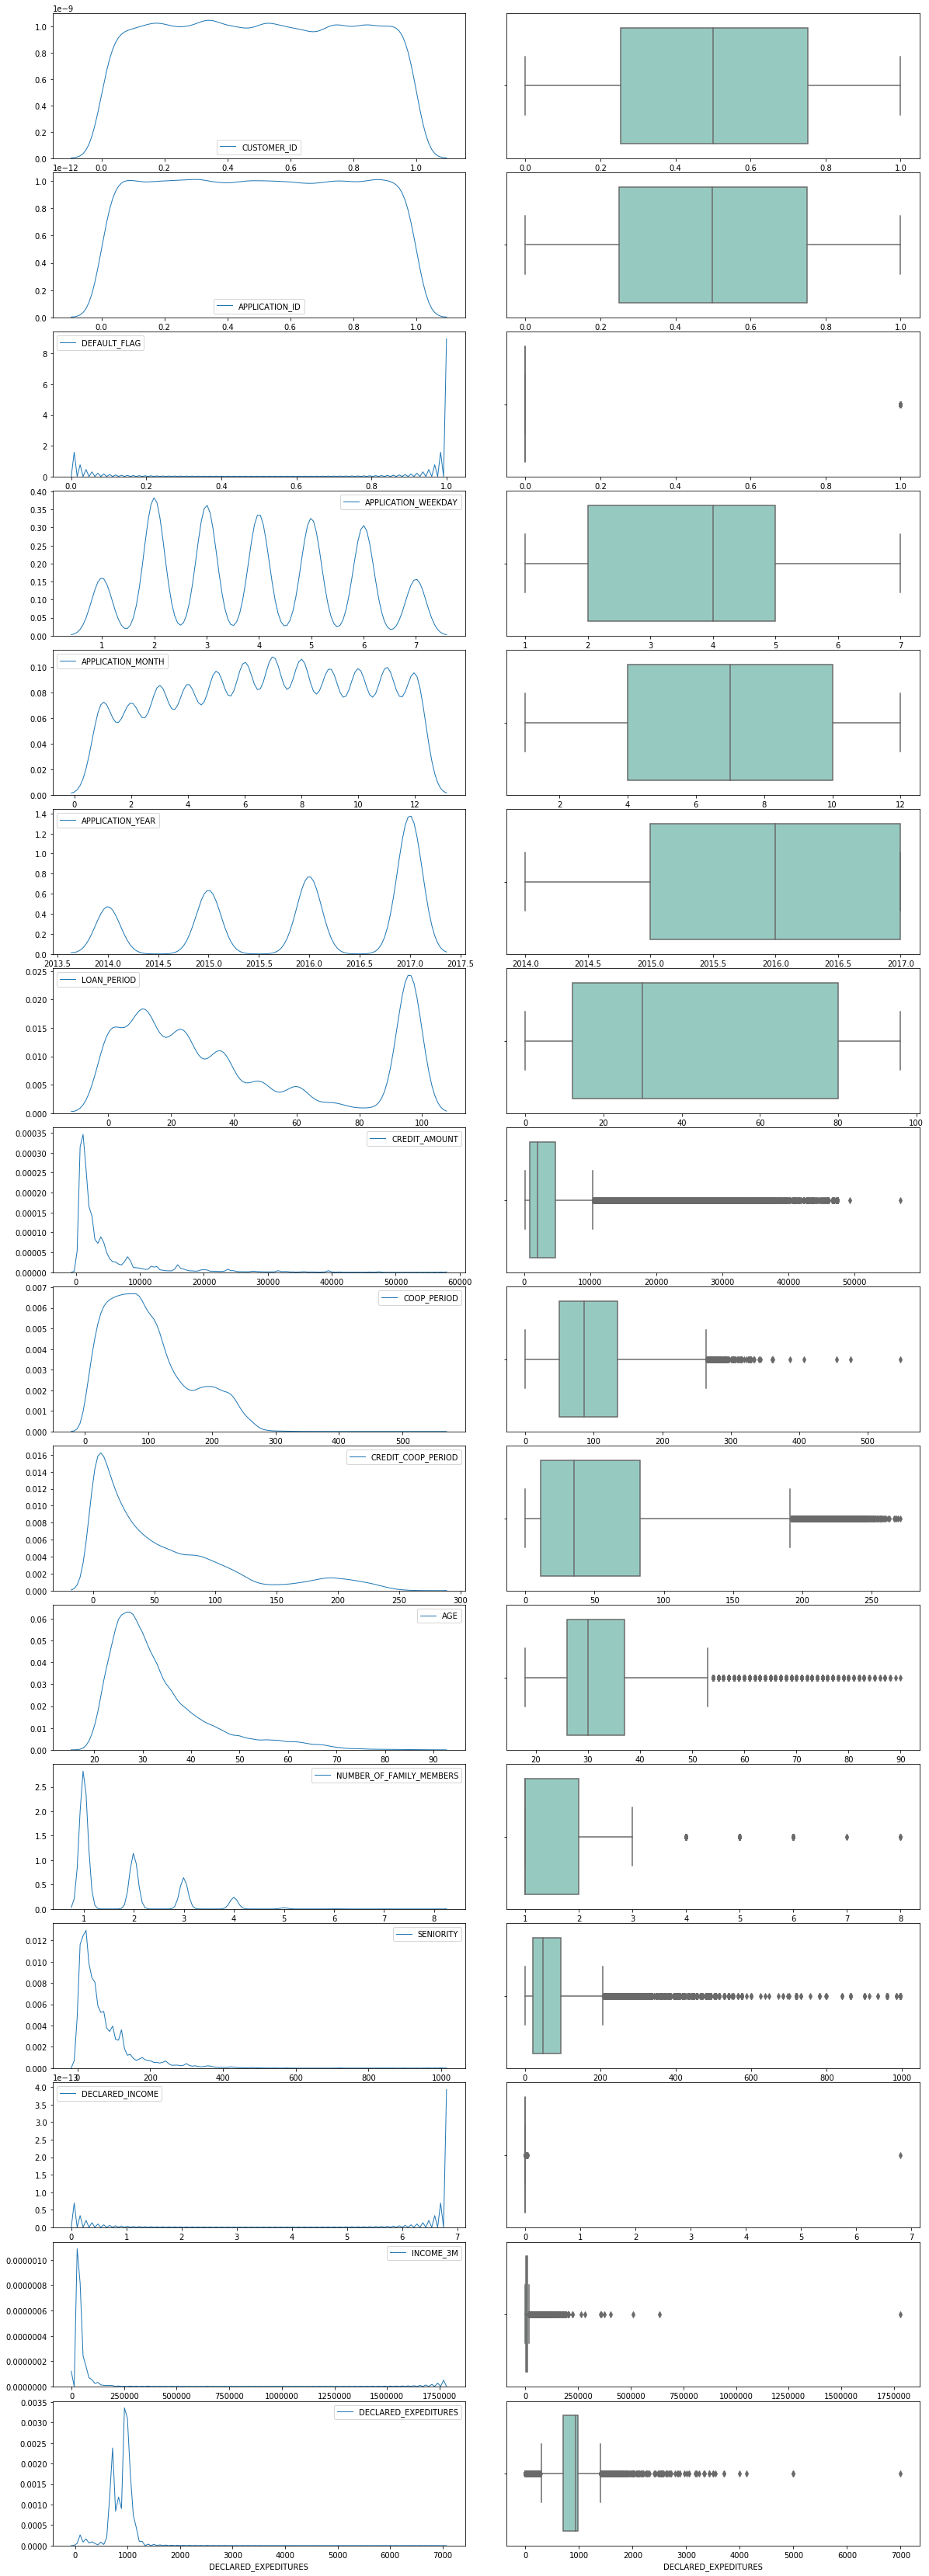

In [10]:
def charts_num(input_data, var_list, cols):
    fig = plt.figure(figsize=(20,60))
    rows = len(var_list)/cols
    for i , column in enumerate(var_list):    
        if (i+1) % 2 != 0: 
            fig.add_subplot(rows,cols,i+1)       
            sns.distplot(input_data[column], hist = False, kde = True,kde_kws = {'linewidth': 1},label = column)
        else:
            fig.add_subplot(rows,cols,i+1)       
            sns.boxplot(x = input_data[column], palette="Set3", data=input_data)    
    plt.subplots_adjust(hspace = 0.1, wspace = 0.1)
    plt.show()
    plt.close(fig)
    
charts_num(df_base, list_fin_1, 2)


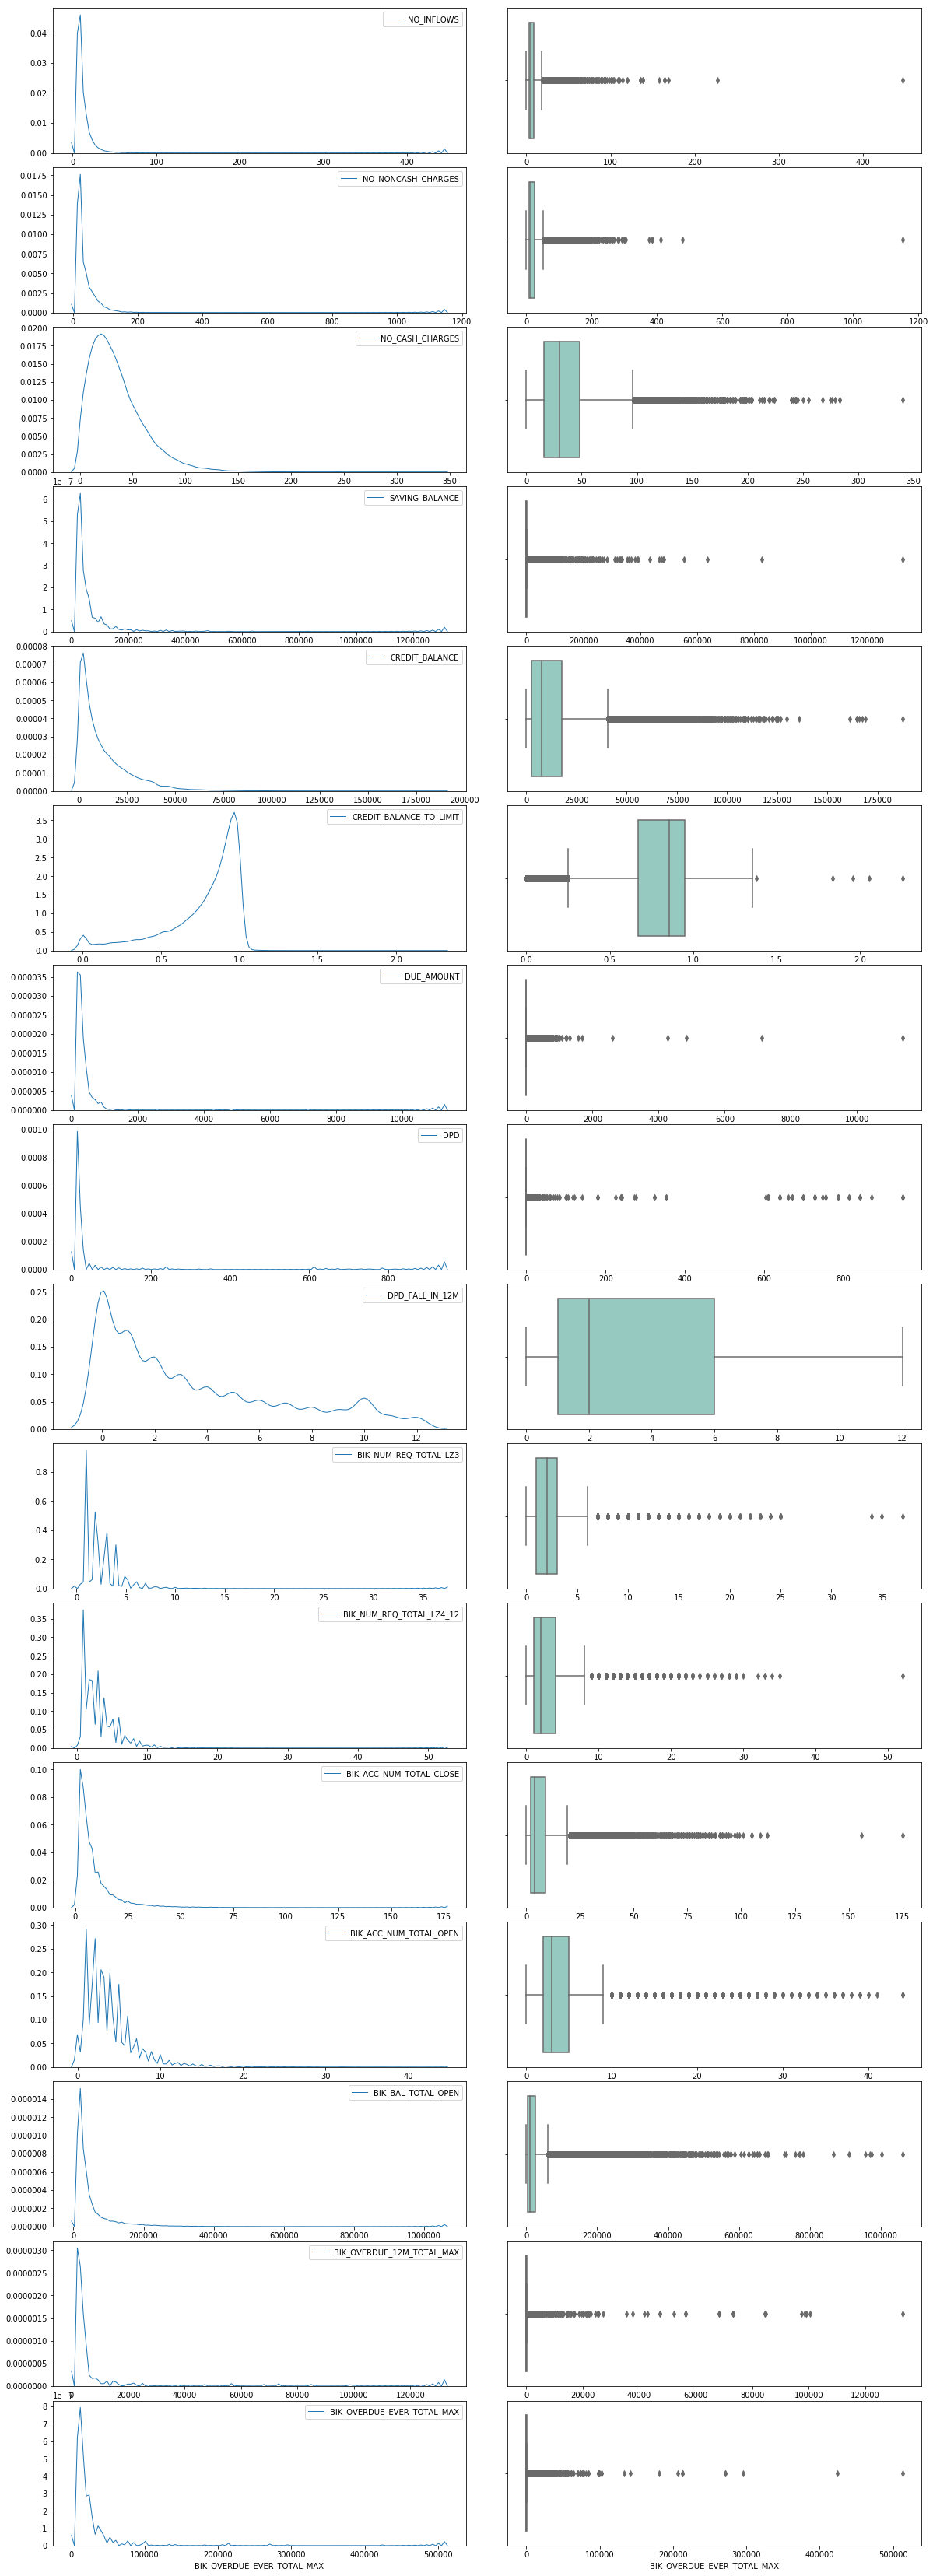

In [11]:
charts_num(df_base, list_fin_2, 2)

Findings:<br>
**CUSTOMER_ID** -> (BRAK NULL) to unikalny identyfikator klienta (brak możliwości analizy poprawności - analiza ilu unikalnych klientów)<br>
**APPLICATION_ID** -> (BRAK NULL) to unikalny identyfikator aplikacji (brak możliwości analizy poprawności - analiza ile unikalnych aplikacji)<br>
! **DEFAULT_FLAG** -> (BRAK NULL) Zmienna TARGET. Do dalszej analizy sprawdzenie rozkładu <br>
**APPLICATION_WEEKDAY** -> (BRAK NULL) Rozkład od 1 do 7 jest poprawny (zgodnie z ilością dni w tygodniu)<br>
**APPLICATION_MONTH** -> (BRAK NULL) Rozkład od 1 do 12 jest poprawny (zgodnie z ilością miesięcy w roku)<br>
**APPLICATION_YEAR** -> (BRAK NULL) Aplikacje kredytowe złożone najwcześniej w 2014 i najpóżniej w 2017 roku<br>
**LOAN_PERIOD** -> (BRAK NULL) Wartość maksymalna okresu kredytowania 96 miesięcy jest zgodna z polityką banku, a minimalna według opisu to kwestia produktów odnawialnych<br>
**CREDIT_AMOUNT** -> (BRAK NULL) Rozkład wartości minimalnej i maksymalnej jest zgodny z regulacjami<br>
**COOP_PERIOD** -> (BRAK NULL) Kwartyle długości realcji z klientem odpowiadają wartością rzeczywistym<br>
**CREDIT_COOP_PERIOD** -> (BRAK NULL) Kwartyle długości realcji kredytowej z klientem odpowiadają wartością rzeczywistym (są dodatkowo niższe od zmiennej powyżej)<br>
**AGE** -> (BRAK NULL) Wartość minimalna (18) i maksymalna (90) zgodna z wiedzą ekspercką<br>
**NUMBER_OF_FAMILY_MEMBERS** -> (BRAK NULL) Wartości od 1 do 8 zgodne z logiką <br>
**SENIORITY** -> (BRAK NULL) Kwartyle zgodne z logiką (wartość maksymalna w realcji z maksymalnym wiekiem jest podejrzana,ale 3 kwartyl i średnia jest ok)<br>
**DECLARED_INCOME** -> (BRAK NULL) Rozkład poprawny<br>
**INCOME_3M** -> ( NULL -> braki danych oznaczają brak rachunku bieżącego w ING, do zastanowienia czy uzupełniać i jaką wartośćią )<br> 
**NO_INFLOWS** -> ( NULL -> zgodnie z opisem danych jest poprawny ponieważ oznacza brak rachunku bieżącego w ING). Rozkład poprawny <br>
**NO_NONCASH_CHARGES** -> ( NULL -> zgodnie z opisem danych jest poprawny ponieważ oznacza brak rachunku bieżącego w ING). Rozkład poprawny <br>
**NO_CASH_CHARGES** -> ( NULL -> zgodnie z opisem danych jest poprawny ponieważ oznacza brak rachunku bieżącego w ING). Rozkład poprawny<br>
**SAVING_BALANCE** -> ( NULL -> zgodnie z opisem danych jest poprawny ponieważ oznacza brak rachunku bieżącego w ING). Rozkład poprawny<br>
**CREDIT_BALANCE** -> ( NULL -> zgodnie z opisem danych jest poprawny ponieważ oznacza brak rachunku bieżącego w ING). Rozkład poprawny <br>
**CREDIT_BALANCE_TO_LIMIT** -> ( NULL -> zgodnie z opisem danych jest poprawny ponieważ oznacza brak dostępnego limitu). Rozkład poprawny <br>
**DUE_AMOUNT** -> ( NULL -> zgodnie z opisem nie jest błędny, oznacza brak produktu kredytowego). Rozkłąd zgodny z wiedzą eksprecką <br>
**DPD** -> ( NULL -> zgodnie z opisem nie jest błędny, oznacza brak produktu kredytowego). Rozkłąd zgodny z wiedzą eksprecką <br>
**DPD_FALL_IN_12M** -> ( NULL -> zgodnie z opisem nie jest błędny, oznacza brak produktu kredytowego). Rozkład zgodny z wiedzą eksprecką <br>
**BIK_NUM_REQ_TOTAL_LZ3** -> (BRAK NULL) Rozkład zgodny z wiedzą eksprecką <br>
**BIK_NUM_REQ_TOTAL_LZ4_12** -> (BRAK NULL) Rozkład zgodny z wiedzą eksprecką <br>
**BIK_ACC_NUM_TOTAL_CLOSE** -> ( NULL -> zgodnie z opisem, brak nie oznacza błędu w danych) Rozkład zgodny z wiedzą eksprecką  <br>
**BIK_ACC_NUM_TOTAL_OPEN** -> ( NULL -> zgodnie z opisem, brak nie oznacza błędu w danych) Rozkład zgodny z wiedzą eksprecką <br>
**BIK_BAL_TOTAL_OPEN** -> ( NULL -> zgodnie z opisem, brak nie oznacza błędu w danych) Rozkład zgodny z wiedzą eksprecką<br>
**BIK_OVERDUE_12M_TOTAL_MAX** -> ( NULL -> zgodnie z opisem, brak nie oznacza błędu w danych) Rozkład zgodny z wiedzą eksprecką<br>
**BIK_OVERDUE_EVER_TOTAL_MAX** -> ( NULL -> zgodnie z opisem, brak nie oznacza błędu w danych) Rozkład zgodny z wiedzą eksprecką<br>

### Dodatkowe analizy zmiennych numerycznych: <br>

**CUSTOMER_ID** -> Sam identyfikator klienta z punktu widzenia biznesowego nie posiada dodatkowej informacji, która powinan być użyta w modelowaniu (interpretowalność), decyduje o usunięciu tej zmiennej

Dla ilu klientów mamy aplikację (według unikalnego numeru klienta) <br>
- Mamy 47179 klientów, co daje średnio 1,67 aplikacji na klienta w okresie 2014 do 2017 - merytorycznie jest to wartość poprawna)  


In [12]:
print(len(df_base.CUSTOMER_ID.unique()))

47179


**APPLICATION_ID** -> numer nadawy przez system aplikacyjny, z biznesowego punktu widzenia nie przydatny do modelowania.

Dodatkowo ID aplikacji kredytowej zawiera tylko 8899 unikalnych rekordów, oznaczałoby to że rózni klienci mogą mieć tą samą aplikacje kredytową <br>
Wartość w tym polu jest błędna, decyduje się na usnięcie tej zmiennej z dalszej analizy 

In [13]:
print(len(df_base.APPLICATION_ID.unique()))

8899


Dodatkowa analiza zmiennych (wersyfikacja rozkładów, jeśli nie będą prawidłowe pozwoli to na redukcje danych) <br>
- **APPLICATION_DATE**
- **APPLICATION_HOUR**
- **APPLICATION_WEEKDAY**
- **APPLICATION_MONTH**
- **APPLICATION_YEAR**


**APPLICATION_DATE**
Została zaimportowana jako str w formacie RRRR-MM-DD<br>
Aby ułatwić dalsze analizy (pogrupowanie na poziomie miesiąca ilości wniosków i sprawdzenie rozkłądu w czasie ich ilości) , konwertuję ją do typu datetime


In [14]:
# Konwersja do typu DATETIME
df_base['APPLICATION_DATE'] =  pd.to_datetime(df_base['APPLICATION_DATE'], format='%Y-%m-%d')

In [15]:
# Dodatkowa kolumna do agregacji na poziomie RRRR MM
df_base['APPLICATION_DATE_RRRR_MM'] = pd.DatetimeIndex(df_base['APPLICATION_DATE']).to_period('Q')

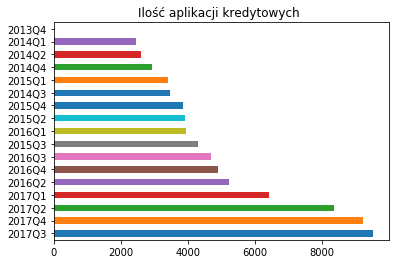

In [16]:
# Rozkład w ukłądzie RRRR MM ilości aplikacji 
df_base['APPLICATION_DATE_RRRR_MM'].value_counts().plot(kind='barh', title="Ilość aplikacji kredytowych ")
plt.show()

Rozkład ilości aplikacji w kolejnych kwartałach jest prawidłowy, większy wzrost w 2017 roku wynika z akcji marketingowej.
Zmienna ze względów merytorycznych nie może być użyta do modelowania (rok rozpatrzenia aplikacji kredytowej nie bedzie mogl predykować w przyszłości)
Z punktu widzenia biznesowego rok udzielenia kredytu nie determinuje wykonania zobowiązania
Decyduje się na usunięcie zmiennej 


**APPLICATION_HOUR**

In [17]:
print(df_base["APPLICATION_HOUR"].value_counts(sort=False))

06-sty    2210 
24-lip    76945
Name: APPLICATION_HOUR, dtype: int64


Informacja w zmiennej **APPLICATION_HOUR** wygląda na błędną, do tego nie wykazuję wolatylności, usuwam ją z daleszej analizy

**APPLICATION_WEEKDAY**

In [18]:
print(df_base["APPLICATION_WEEKDAY"].value_counts(sort=False))

1    6267 
2    14860
3    14116
4    13212
5    12708
6    11862
7    6130 
Name: APPLICATION_WEEKDAY, dtype: int64


Rozkład wygląda prawidłowo.
Może okazać się że dzień złożenia aplikacji o kredyt ma wpływ na jego przyszłą spłate, tylko że ciężko będzie o interpretowalność biznesową takiej zmiennej, może się okazać, że np kredyty udzielane w piątek sa bardziej ryzykowne, niż te udzielone w poniedziałek. Ale nawet jeśli tak wyjdzie to z biznesowego punktu widzenia nie uzależnimy akcji kredytowej od dnia tygodnia. Decyduje się na usunięcie zmiennej z dalszej analizy

**APPLICATION_MONTH**

In [19]:
print(df_base["APPLICATION_MONTH"].value_counts(sort=False))

1     5225
2     5022
3     6010
4     6086
5     6762
6     7300
7     7608
8     7419
9     6947
10    6904
11    7013
12    6859
Name: APPLICATION_MONTH, dtype: int64


Rozkład wygląda prawidłowo , może okazać się że dzień złożenia aplikacji o kredyt ma wpływ na jego przyszłą spłate (merytorycznie jest to możliwe,np kredyt udzielony na świetą/wakacje bez przemyślenia przyszłej spłaty).
Jednak pozostaje kwestia biznesowa, która budzi wątpliwości przy wdrożeniu takiego modelu z podobnych powodów co APPLICATION_WEEKDAY. Decyduję się na usunięcie zmiennej z analizy

**APPLICATION_YEAR**

In [20]:
print(df_base["APPLICATION_YEAR"].value_counts(sort=False))

2014    11454
2015    15453
2016    18747
2017    33501
Name: APPLICATION_YEAR, dtype: int64


Rozkład prawidłwy, informacja jest już zdublowana w **APPLICATION_DATE** <br>
Decyduje się na usunięcie zmiennej z dalszej analizy

### Wykluczenie zidentyfikowanych zmiennych numerycznych z dalszej analizy

In [21]:
df_base.drop(columns='CUSTOMER_ID',axis=1, inplace=True)
df_base.drop(columns='APPLICATION_ID',axis=1, inplace=True)
df_base.drop(columns='APPLICATION_DATE_RRRR_MM',axis=1, inplace=True)
df_base.drop(columns='APPLICATION_HOUR',axis=1, inplace=True)
df_base.drop(columns='APPLICATION_WEEKDAY',axis=1, inplace=True)
df_base.drop(columns='APPLICATION_MONTH',axis=1, inplace=True)
df_base.drop(columns='APPLICATION_YEAR',axis=1, inplace=True)
df_base.drop(columns='APPLICATION_DATE',axis=1, inplace=True)

### Dodatkowa wizualizacja zmiennych numerycznych
- wybieram zmienne, któe przyjmują mniej niż 100 unikalnych wartości 

In [22]:
col_num_add = list()
for x in df_base.select_dtypes(include=['int64','float64']).columns:
    if len(df_base[x].value_counts()) <= 100:
        col_num_add.append(x)

In [23]:
list_fin_add=list()
for i , column in enumerate(col_num_add):    
    list_fin_add.append(column)
    list_fin_add.append(column)

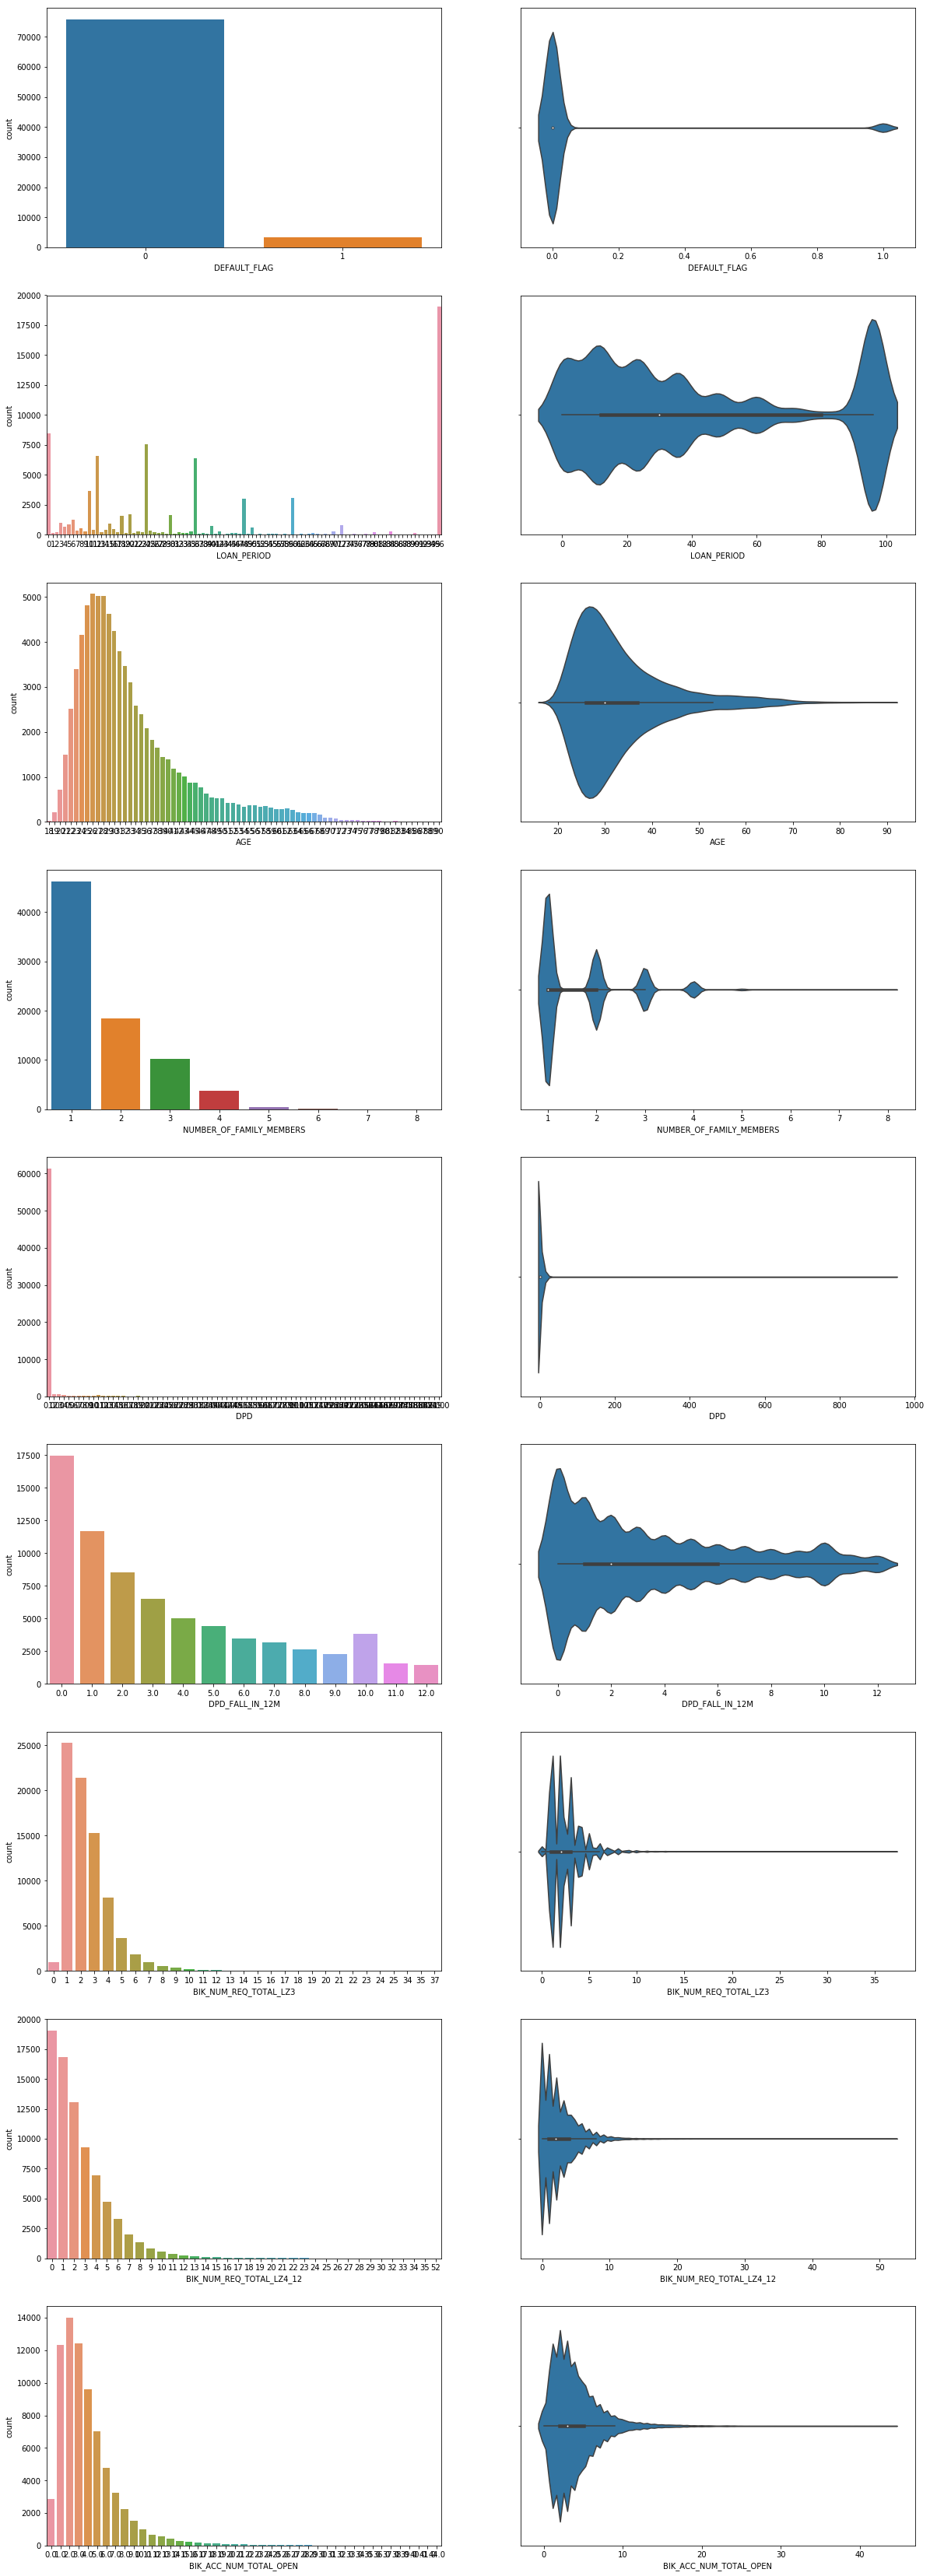

In [24]:
def charts_num_add(input_data, var_list, cols):
    fig = plt.figure(figsize=(20,60))
    rows = len(var_list)/cols
    for i , column in enumerate(var_list):    
        if (i+1) % 2 != 0: 
            fig.add_subplot(rows,cols,i+1)      
            #sns.distplot(input_data[column], hist = True, kde = True,kde_kws = {'linewidth': 1},label = column)
            sns.countplot(x=input_data[column])
        else:
            fig.add_subplot(rows,cols,i+1)   
            sns.violinplot(input_data[column])   
    plt.subplots_adjust(hspace = 0.2, wspace = 0.2)
    plt.show()
    plt.close(fig)
    
charts_num_add(df_base, list_fin_add, 2)

## Analiza zmiennych kategorycznych

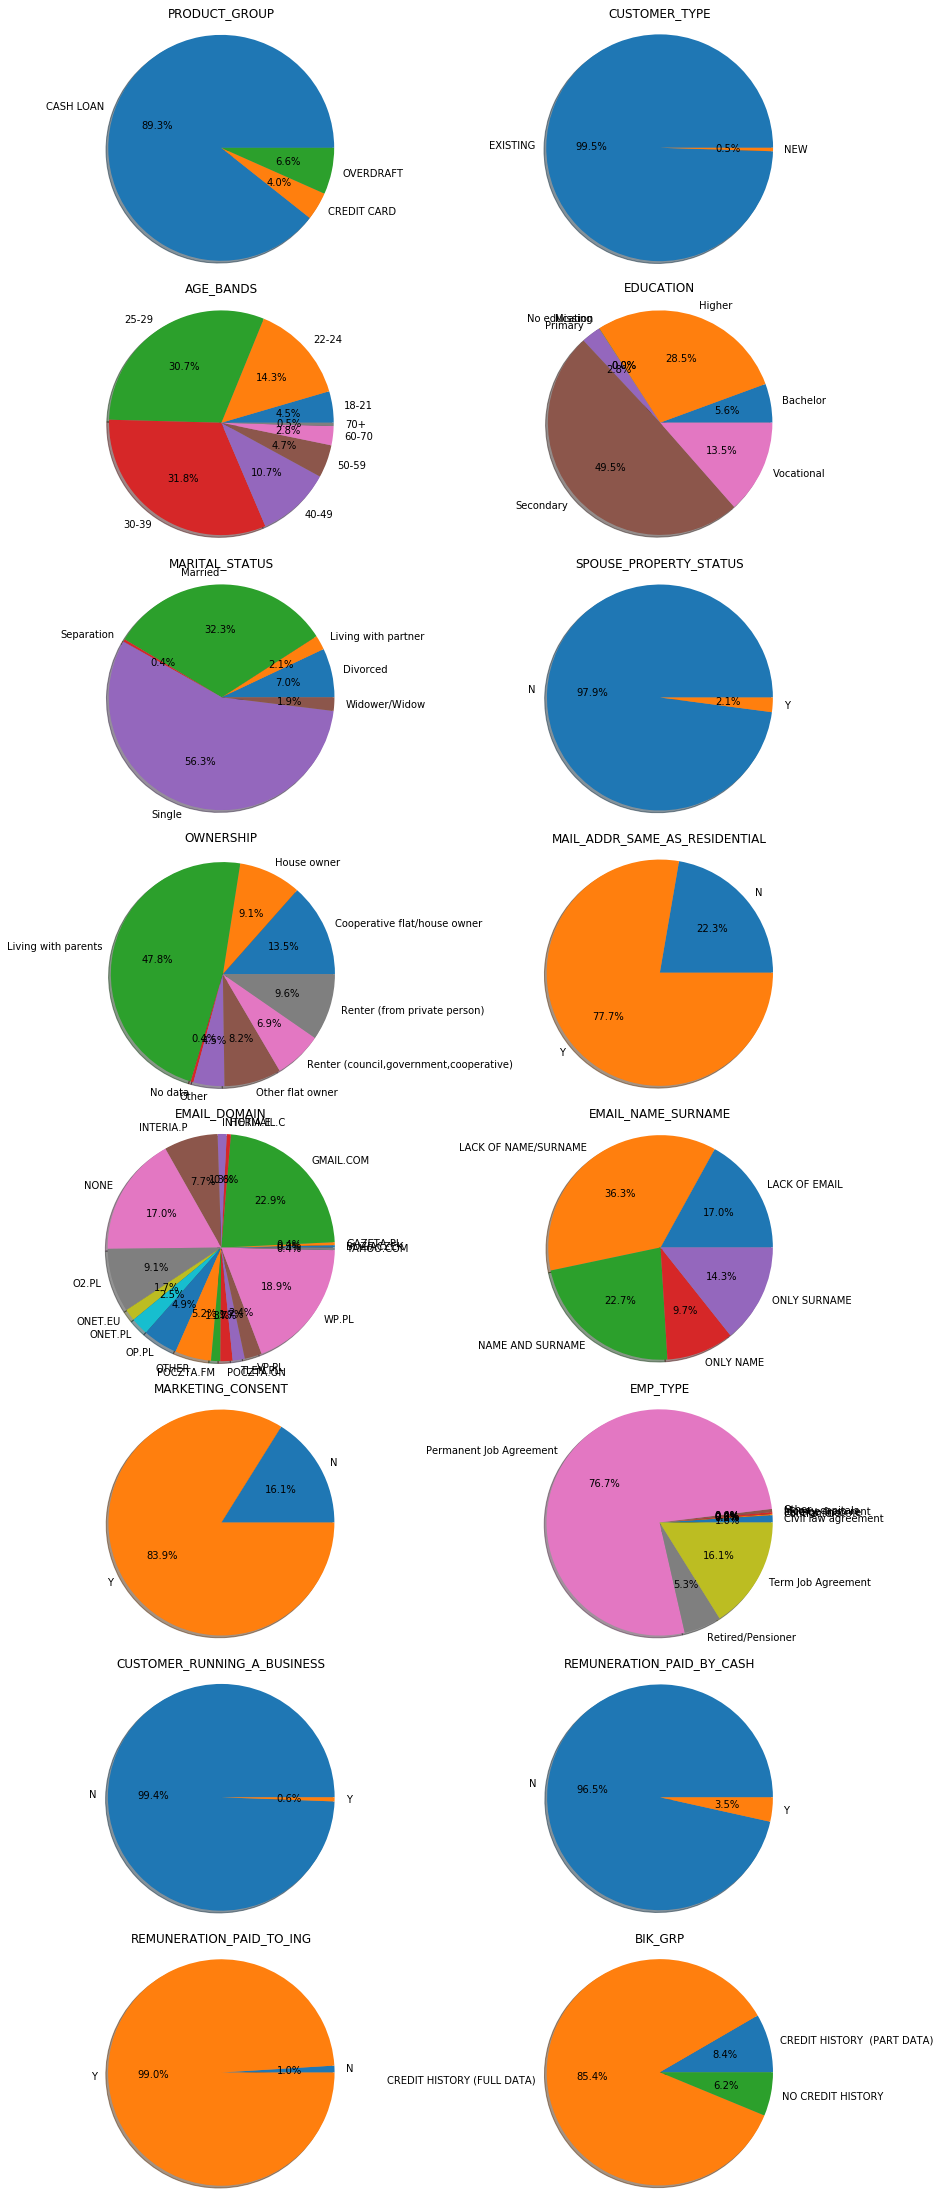

In [25]:
# Wykresy w ujęciu %

col_num_obj = list()
for x in df_base.select_dtypes(include=['object']).columns:
        col_num_obj.append(x)

def charts_num_obj(input_data, var_list, cols):
    fig = plt.figure(figsize=(15,40))
    rows = math.ceil(len(var_list)/cols)
    for i , column in enumerate(var_list):
        ax1 = fig.add_subplot(rows,cols,i+1)
        labels = input_data[column].astype('category').cat.categories.tolist()
        counts = input_data[column].value_counts()
        sizes = [counts[var_cat] for var_cat in labels]
        plt.title(column)
        ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
        ax1.axis('equal')
            
    plt.subplots_adjust(hspace = 0.1, wspace = 0.1)
    plt.show()
    plt.close(fig)
    
charts_num_obj(df_base, col_num_obj, 2)


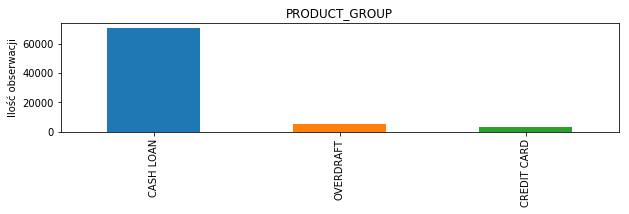

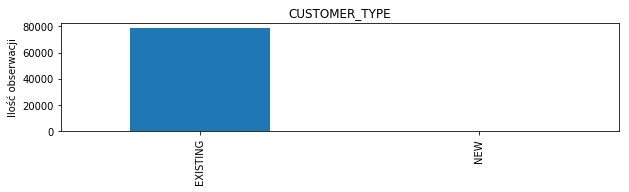

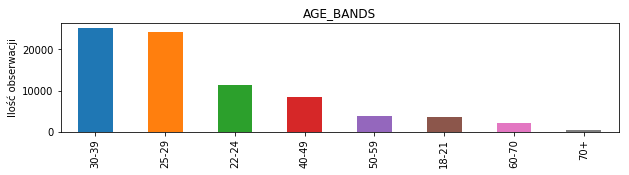

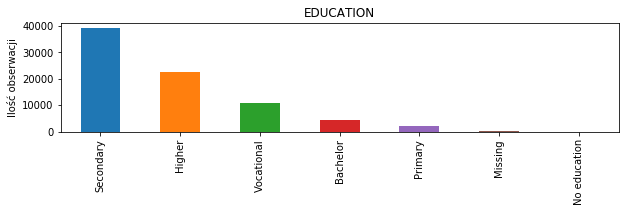

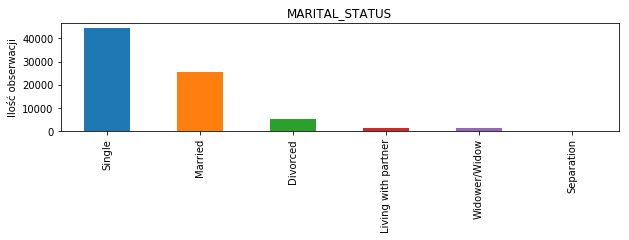

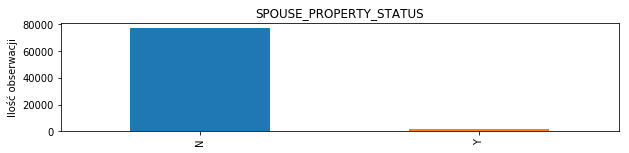

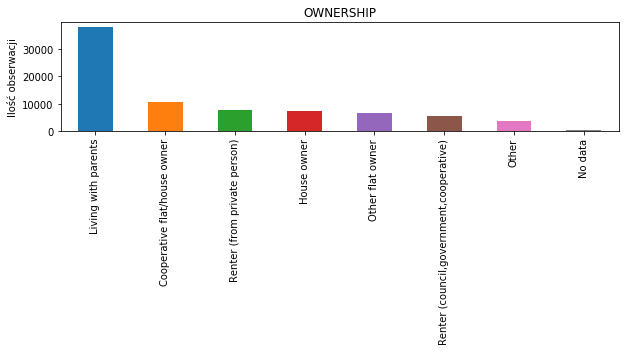

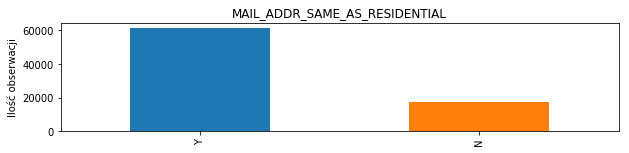

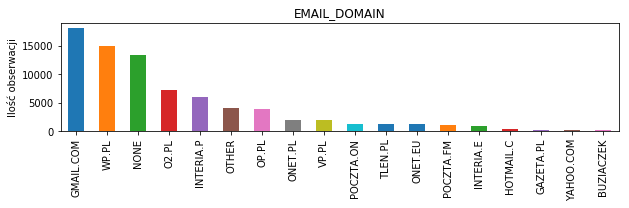

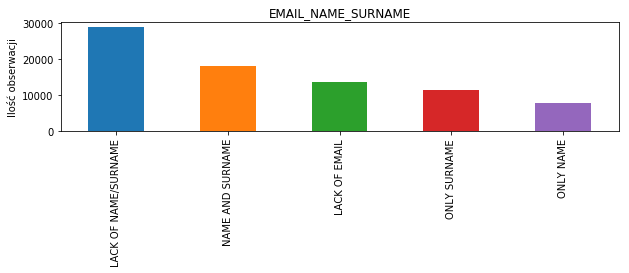

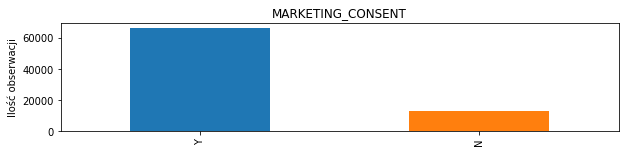

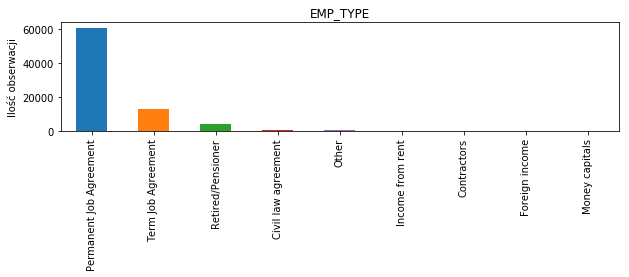

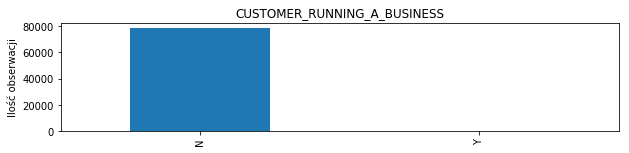

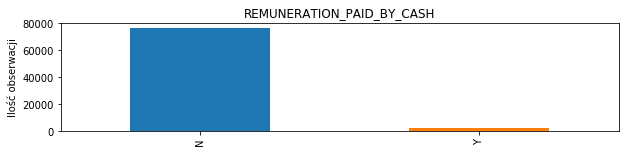

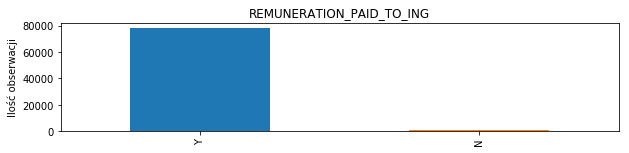

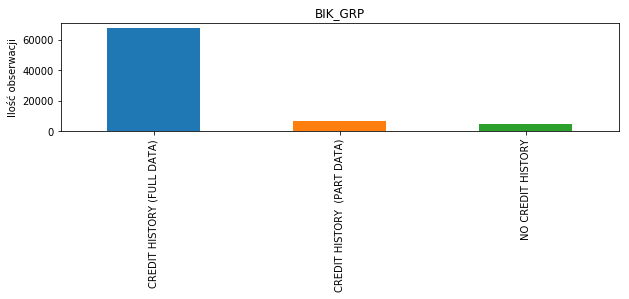

In [26]:
# Wykresy w ujęciu ilościowym
column_obj_kat = df_base.select_dtypes(include=['object']).columns

for col in column_obj_kat:
    df_base[col].value_counts().plot(kind='bar', title=col,figsize=(10, 2))
    plt.ylabel("Ilość obserwacji")
    plt.show()

**Zidentyfikowałem** kolumny kategoryczne o 2 wartościach (np Y i N) , aby zoptymalizować przetwarzanie utworze kolumny o wartosciach 0 i 1 (Zamiast robić 2 kolumny nazwa_y i nazwa_N 

-Wybieram tylko kolumny z danymi kategorycznymi o dwóch wartościach 

In [27]:
column_obj_kat = df_base.select_dtypes(include=['object']).columns

for col in column_obj_kat:
    if df_base[col].value_counts().shape[0] == 2 :
        print(df_base[col].value_counts(sort=False))
# powyżej sprawdzam ponowie czy wartości to Y/N i rozkład

NEW         389  
EXISTING    78766
Name: CUSTOMER_TYPE, dtype: int64
N    77510
Y    1645 
Name: SPOUSE_PROPERTY_STATUS, dtype: int64
N    17641
Y    61514
Name: MAIL_ADDR_SAME_AS_RESIDENTIAL, dtype: int64
N    12760
Y    66395
Name: MARKETING_CONSENT, dtype: int64
N    78695
Y    460  
Name: CUSTOMER_RUNNING_A_BUSINESS, dtype: int64
N    76406
Y    2749 
Name: REMUNERATION_PAID_BY_CASH, dtype: int64
N    771  
Y    78384
Name: REMUNERATION_PAID_TO_ING, dtype: int64


**LabelEncoder**

In [28]:
label_encoder_col = ['CUSTOMER_TYPE','SPOUSE_PROPERTY_STATUS','MAIL_ADDR_SAME_AS_RESIDENTIAL','MARKETING_CONSENT','CUSTOMER_RUNNING_A_BUSINESS','REMUNERATION_PAID_BY_CASH','REMUNERATION_PAID_TO_ING']

In [29]:
#df_base_le=df_base.copy()

column_obj_kat = df_base.select_dtypes(include=['object']).columns

for col in column_obj_kat:
    if df_base[col].value_counts().shape[0] == 2 :
        label_encoder = LabelEncoder()
        df_base[col] = label_encoder.fit_transform(df_base[col])

Wyświetlam ponownie zbiorczy set wykresów z danymi kategorycznymi (nie powinno być już zmiennych z 2 wartościami)

In [30]:
df_base.head(2) 

,DEFAULT_FLAG,PRODUCT_GROUP,LOAN_PERIOD,CREDIT_AMOUNT,CUSTOMER_TYPE,COOP_PERIOD,CREDIT_COOP_PERIOD,AGE,AGE_BANDS,EDUCATION,MARITAL_STATUS,SPOUSE_PROPERTY_STATUS,OWNERSHIP,NUMBER_OF_FAMILY_MEMBERS,MAIL_ADDR_SAME_AS_RESIDENTIAL,EMAIL_DOMAIN,EMAIL_NAME_SURNAME,MARKETING_CONSENT,EMP_TYPE,SENIORITY,CUSTOMER_RUNNING_A_BUSINESS,REMUNERATION_PAID_BY_CASH,REMUNERATION_PAID_TO_ING,DECLARED_INCOME,INCOME_3M,DECLARED_EXPEDITURES,NO_INFLOWS,NO_NONCASH_CHARGES,NO_CASH_CHARGES,SAVING_BALANCE,CREDIT_BALANCE,CREDIT_BALANCE_TO_LIMIT,DUE_AMOUNT,DPD,DPD_FALL_IN_12M,BIK_NUM_REQ_TOTAL_LZ3,BIK_NUM_REQ_TOTAL_LZ4_12,BIK_GRP,BIK_ACC_NUM_TOTAL_CLOSE,BIK_ACC_NUM_TOTAL_OPEN,BIK_BAL_TOTAL_OPEN,BIK_OVERDUE_12M_TOTAL_MAX,BIK_OVERDUE_EVER_TOTAL_MAX
0,0,CASH LOAN,96,4200,0,44,34,29,25-29,Higher,Single,0,Renter (from private person),1,0,GMAIL.COM,ONLY SURNAME,1,Permanent Job Agreement,12,0,0,1,3970,10100.0,1071.83,6.0,22.0,16.0,0.0,19140.0,0.913025,0.0,0.0,4.0,2,3,CREDIT HISTORY (FULL DATA),5.0,9.0,19250.0,0.0,0.0
1,0,CASH LOAN,36,11100,0,52,39,25,25-29,Higher,Single,0,Living with parents,1,0,WP.PL,ONLY SURNAME,1,Permanent Job Agreement,19,0,0,1,5580,7200.0,1080.00,8.0,8.0,68.0,NaN,NaN,NaN,NaN,NaN,8.0,2,2,CREDIT HISTORY (FULL DATA),1.0,2.0,10950.0,0.0,3244.0


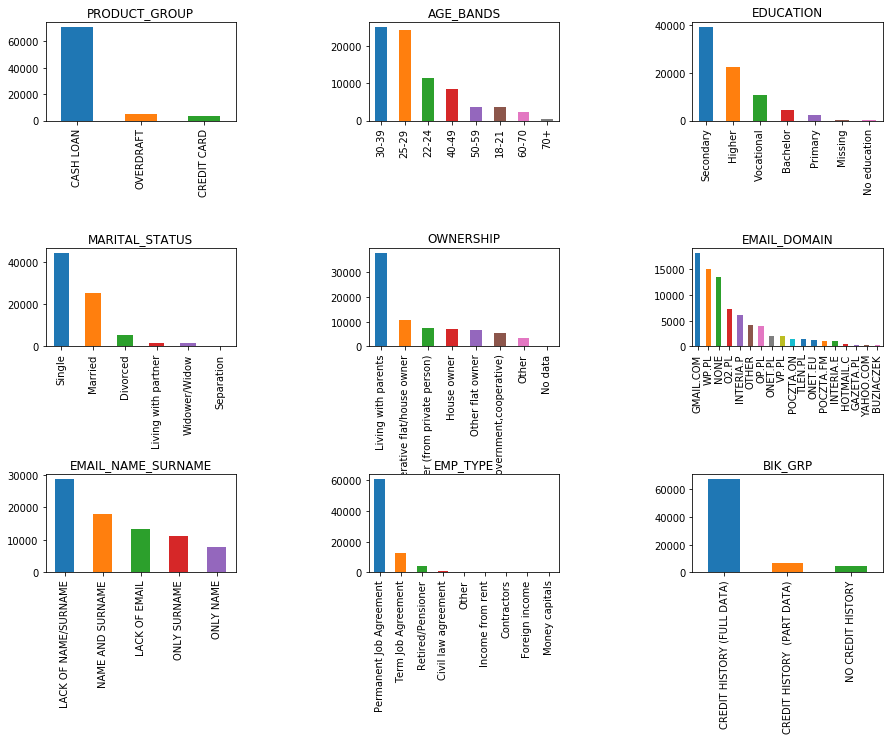

In [31]:
fig = plt.figure(figsize=(15,60))
cols = 3
rows = math.ceil(float(df_base.shape[1])/cols)
for i , column in enumerate(df_base.select_dtypes(include=['object']).columns):
    ax = fig.add_subplot(rows,cols,i+1)
    ax.set_title(column)
    if df_base.dtypes[column] == np.object:
        df_base[column].value_counts().plot(kind="bar", axes = ax)
    else:
        df_base[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace = 1.3, wspace = 0.7)

## ANALIZA OUTLIERS

Identyfikacja wartości odstających w zmiennych numerycznych

Korzystan z informacji z linków poniżej (  ):
<br>
https://stackoverflow.com/questions/12082568/what-exactly-do-the-whiskers-in-pandas-boxplots-specify
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

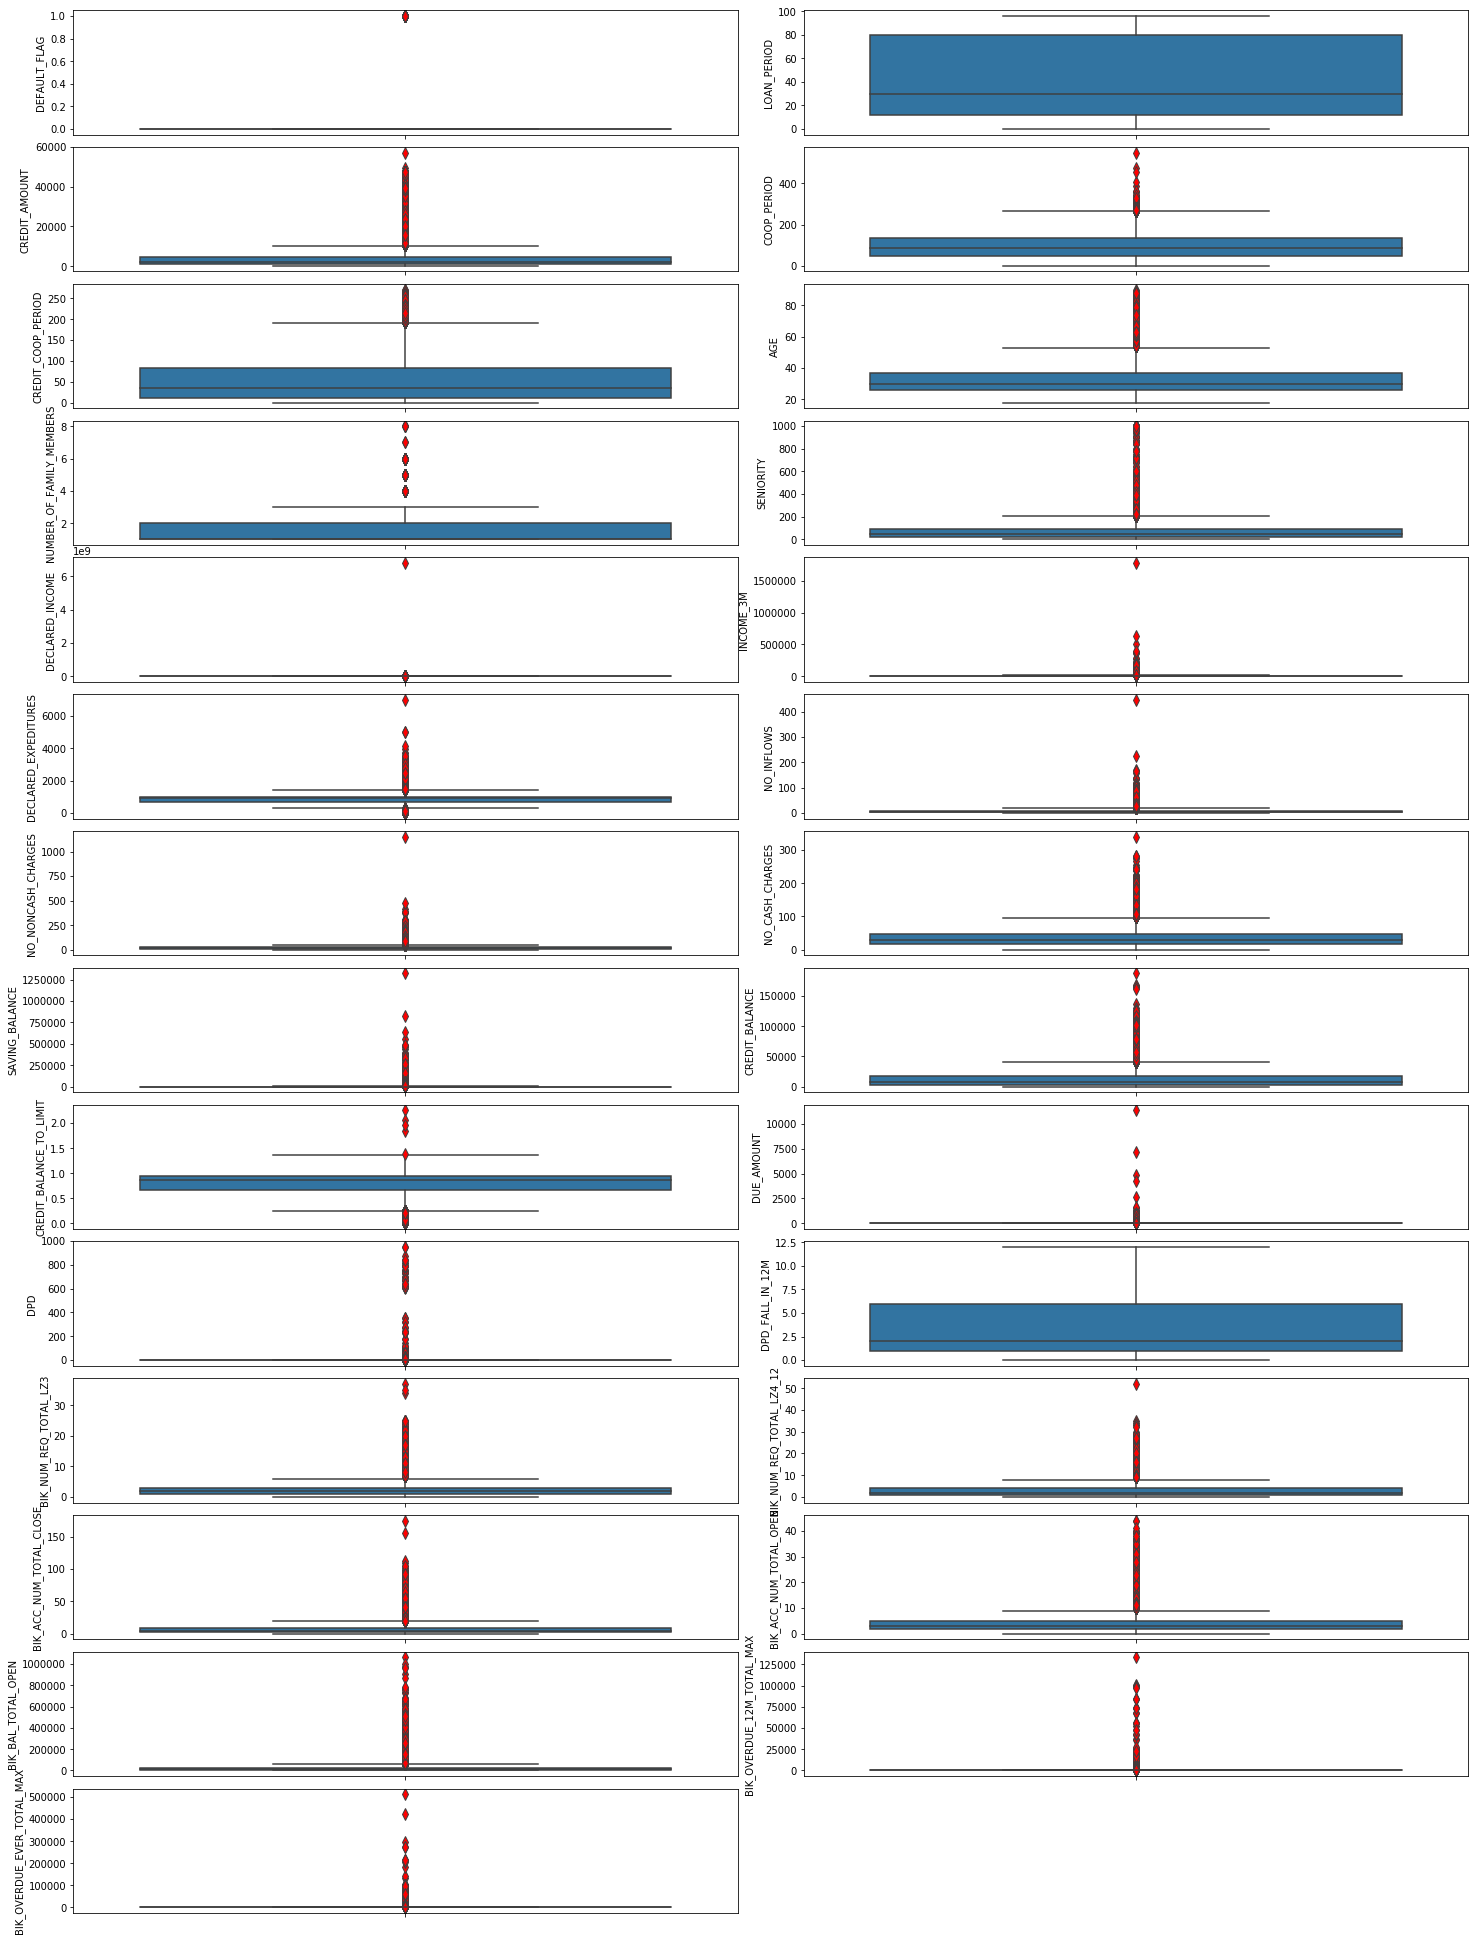

In [32]:
col_num_outl = list()
for x in df_base.select_dtypes(include=['int64','float64']).columns:
        col_num_outl.append(x)

def charts_num_obj(input_data, var_list, cols):
    fig = plt.figure(figsize=(25,35))
    rows = math.ceil(len(var_list)/cols)
    for i , column in enumerate(var_list):   
        ax = fig.add_subplot(rows,cols,i+1)
        #ax.set_title(column) 
        flierprops = dict(markerfacecolor='r', markersize=8, linestyle='none')
        sns.boxplot(x = input_data[column]  , ax = ax , orient = "v",flierprops=flierprops , whis = 1.5 )
            
        #sns.swarmplot(x = input_data[column], color=".2")
            
    plt.subplots_adjust(hspace = 0.1, wspace = 0.1)
    plt.show()
    plt.close(fig)
    
charts_num_obj(df_base, col_num_outl, 2)


In [33]:
#Wyznaczenie kwartylu 1, 3, mediany, średniej, odchylenia standardowego

def stat(input_table):
    kwa_1 = list()
    kwa_2 = list()
    kwa_3 = list()
    avg = list()
    std =  list()
    index = list()
    ile = list()
    ilosc_outliers_l = list()
    ilosc_outliers_u = list()
    null = list()
    null_perc = list()
    ile_out =  list()
    perc_outlier = list()

    for col in input_table.select_dtypes(include=['int64','float64']).columns:
        avg.append(input_table[col].mean())
        std.append(input_table[col].std())
        index.append(col)
        ile.append(input_table[col].count()) 
        kwa_p_1 =input_table[col].quantile(0.25)
        kwa_p_3=input_table[col].quantile(0.75)
        kwa_1.append(kwa_p_1)
        kwa_2.append(input_table[col].quantile(0.50))
        kwa_3.append(kwa_p_3)
        roz=kwa_p_3-kwa_p_1
        null_value = input_table[col].isnull()
        null.append(null_value.sum())
        
        null_perc_ile = input_table[col].isnull() / input_table[col].count()
        
        null_perc.append(null_perc_ile.sum())
            
        ile_out.append(sum(input_table[col]>kwa_p_3+1.5*roz)+sum(input_table[col]<kwa_p_1-1.5*roz))  
        perc_outlier.append((sum(input_table[col]>kwa_p_3+1.5*roz)+sum(input_table[col]<kwa_p_1-1.5*roz))/(input_table[col].count()))
    
    pd.options.display.float_format = '{:.2f}'.format       
    tabela=pd.DataFrame({'Ilość':ile,"Średnia":avg,"odchylenie":std,"I kwartyl":kwa_1,"Mediana":kwa_2,"III kwartyl":kwa_3
                     ,"Ilość outliers":ile_out, "% outliers":perc_outlier, "NULL":null,"% NULL":null_perc },index=index)
    return tabela

stat(df_base)

,Ilość,Średnia,odchylenie,I kwartyl,Mediana,III kwartyl,Ilość outliers,% outliers,NULL,% NULL
DEFAULT_FLAG,79155,0.04,0.20,0.00,0.00,0.00,3357,0.04,0,0.00
LOAN_PERIOD,79155,41.48,35.39,12.00,30.00,80.00,0,0.00,0,0.00
CREDIT_AMOUNT,79155,4667.30,6685.30,900.00,2100.00,4700.00,9200,0.12,0,0.00
COOP_PERIOD,79155,98.58,64.07,49.00,86.00,135.00,379,0.00,0,0.00
CREDIT_COOP_PERIOD,79155,55.94,58.84,11.00,35.00,83.00,4501,0.06,0,0.00
AGE,79155,33.01,10.26,26.00,30.00,37.00,4797,0.06,0,0.00
NUMBER_OF_FAMILY_MEMBERS,79155,1.66,0.92,1.00,1.00,2.00,4185,0.05,0,0.00
SENIORITY,79155,69.89,80.30,22.00,47.00,96.00,4828,0.06,0,0.00
DECLARED_INCOME,79155,91034.33,24181305.56,2150.00,2680.00,3490.00,4272,0.05,0,0.00
INCOME_3M,78384,8288.96,12351.02,3600.00,5600.00,9200.00,6323,0.08,771,0.01



**Wnioski**
Wiekszość zmiennych numerycznych posiada outliersy.
Postanowiłem zastosować dwie metody (rozdzielnie, generując osobne zbiory):
<br>**- Klasyczna metoda polegająca na zamianie wartości outliers na wartości graniczne zmiennej (kwartyl3+1.5*(kwartyl3 - kwartyl1))**<br>
<br>



## Wartości NULL


Poniżej tablica z zmiennymi (numerycznymi) posiadającymi wartości null ( % udziału w całości w tablicy powyżej)

In [34]:
null_col = df_base.columns[df_base.isnull().any()].tolist()
null_counts = df_base[null_col].isnull().sum() 
print("Ilość wartości NULL w poszczególnych zmiennych:\n{}".format(null_counts))

Ilość wartości NULL w poszczególnych zmiennych:
INCOME_3M                     771  
DECLARED_EXPEDITURES          24592
NO_INFLOWS                    771  
NO_NONCASH_CHARGES            771  
NO_CASH_CHARGES               771  
SAVING_BALANCE                14659
CREDIT_BALANCE                13279
CREDIT_BALANCE_TO_LIMIT       13279
DUE_AMOUNT                    13279
DPD                           13279
DPD_FALL_IN_12M               7183 
BIK_ACC_NUM_TOTAL_CLOSE       4933 
BIK_ACC_NUM_TOTAL_OPEN        4933 
BIK_BAL_TOTAL_OPEN            4933 
BIK_OVERDUE_12M_TOTAL_MAX     4933 
BIK_OVERDUE_EVER_TOTAL_MAX    4933 
dtype: int64


Zidentyfikowane wartości NULL w zmiennych numerycznych (wraz z opisem ich znaczenia)/ sposób wypełnienia:<br><br>
**INCOME_3M**                  78384 non-null - (NULL - brak rachunku bieżącego w ING)/ MEAN<br>
**DECLARED_EXPEDITURES**       54563 non-null - (na moment aplikacji; NULL - brak deklaracji wydatków przez klienta)/ MEAN (dla                                deklarowenej ilosci osob w gosp), duża ilość wartości NULL<br>
**NO_INFLOWS**                 78384 non-null - (NULL - brak rachunku bieżącego w ING)/ MEAN<br>
**NO_NONCASH_CHARGES**         78384 non-null - (NULL - brak rachunku bieżącego w ING)/ MEAN<br>
**NO_CASH_CHARGES**            78384 non-null - (NULL - brak rachunku bieżącego w ING)/ MEAN<br>
**SAVING_BALANCE**             64496 non-null - (NULL - brak rachunku oszczędnościowego w ING)/MEAN ważna zmienna z której można utworzyć dodatkową zmienną z informacją o tym czy klient ma rachunek oszczędnościowy  <br>
**CREDIT_BALANCE**             65876 non-null - (NULL - produktu kredytowego w ING; 0-posiadanie produktu limitowego z                                                         niewykorzystanym limitem)/MEAN <br>
**CREDIT_BALANCE_TO_LIMIT**    65876 non-null - (NULL- dostępnego limitu, 0 zaś brak ekspozycji kredytowej mimo posiadanego                                                     limitu)/MEAN <br>
**DUE_AMOUNT**                 65876 non-null - (NULL- klient nie ma aktualnie produktu kredytowego) (?)/MEAN<br>
**DPD**                        65876 non-null - (NULL- klient nie ma aktualnie produktu kredytowego) (?)/MEAN<br>
**DPD_FALL_IN_12M**            71972 non-null - (NULL- brak produktów kredytowych w ostatnich 12 miesiącach)/MEAN<br>
**BIK_ACC_NUM_TOTAL_CLOSE**    74222 non-null - (NULL- brak historii kredytowej w BIK)/MEAN<br>
**BIK_ACC_NUM_TOTAL_OPEN**     74222 non-null - (NULL- brak historii kredytowej w BIK)/MEAN<br>
**BIK_BAL_TOTAL_OPEN**         74222 non-null - (NULL- brak historii kredytowej w BIK)/MEAN<br>
**BIK_OVERDUE_12M_TOTAL_MAX**  74222 non-null - (NULL- brak historii kredytowej w BIK)/MEAN<br>
**BIK_OVERDUE_EVER_TOTAL_MAX** 74222 non-null - (NULL- brak historii kredytowej w BIK)/MEAN<br>
<br>
Zidentyfikowane NULL w zmiennych typu **STR**<br>
**EDUCATION**	-	Missing
**OWNERSHIP**	-	No data	

Dla wielu zmiennych istnieje dokładnie taka sama ilość wartości NULL, jest to spowodowane podobnym znaczeniem biznesowym danych
- Zastosuje zastąpienie wartości NULL medianą dla poszczegolnych zmiennych

- Dodatkowo zastpsuje nową ciekawą metoda **IterativeImputer**(paczka jest oznaczona jako dalej w wersji eksperymentalnej, choć założenia co do jej działania są obiecujące) <br>
https://scikit-learn.org/stable/modules/impute.html

Na podstawie zmiennej **SAVING_BALANCE** tworze nową zmieną **SAVINGS**, 0- oznacza brak konta oszczędnościowego, 1- oznacza posiadanie konta oszczędnościowego, zmienna zostanie dołączona do próbki

In [35]:
# utworzenie dodatkowej zmiennej SAVING
df_base['SAVINGS']=np.where(df_base['SAVING_BALANCE'].isnull(),1,0)

## Budowa transformat do realizacji wcześniejszych założeń (użycie w pipeline)

**Wybór zmiennych** - Klasa do wyboru zmiennych, do użycia w pipeline 

In [36]:
# Tworze clase do wyboru zmiennych
class Selectcol(TransformerMixin,BaseEstimator):
    
    def __init__(self,col):
        self.col=col

    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        return X[self.col]

### **1. Zmienne kategoryczne**

**OneHotEncoding** do przejścia ze zmiennych kategorycznych na zmienne numeryczne 0/1 (spowoduje to znaczy przyrost ilości kolumn) (Klasa do wyboru zmiennych, korzystam z gotowej zaimportowanej paczki (ce), do użycia w pipeline)

Zdefiniowałem klase (wybór zmiennych) aby użyć pipeline do zmiany danych, posługiwałem się informacjami z linka poniżej

https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html
https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html
https://medium.com/hugo-ferreiras-blog/dealing-with-categorical-features-in-machine-learning-1bb70f07262d
https://stackoverflow.com/questions/49018652/how-to-combine-labelbinarizer-and-onehotencoder-in-pipeline-in-python-for-catego
https://medium.com/hugo-ferreiras-blog/dealing-with-categorical-features-in-machine-learning-1bb70f07262d?fbclid=IwAR2AJ0XUMOsoHYRqQVTkSp0HOAjC5JxmDVFpC_BK7eZ9dkHcG6n24GzLHg0

**Target Encoder**
<br> Używam dodatkowo Target Encoder, o którym szczegółowe informacje zasięgnąłem z linków poniżej

https://contrib.scikit-learn.org/categorical-encoding/targetencoder.html
https://towardsdatascience.com/why-you-should-try-mean-encoding-17057262cd0

### **2. Outliers**<br>
Zdefiniowałem klase z imputerem outliers, jest to implementacja zastąpienia outliersów zgodnie z wcześniejszymi założeniami

In [37]:
class Simpleoutliersfill(TransformerMixin,BaseEstimator):
    def __init__(self, column):
        self.column = column

    def fit(self,X, y = None):
        self.kwa_1 = X[self.column].quantile(0.25)
        self.kwa_3 = X[self.column].quantile(0.75)
        self.roz = self.kwa_3-self.kwa_1
        self.low = (self.kwa_1 - 1.5*self.roz)
        self.up = (self.kwa_3 + 1.5*self.roz)
        return self
    
    def transform(self,X):
        for column in self.column:
            X.loc[X[column] < self.low[column],column] = self.low[column]
            X.loc[X[column] > self.up[column],column] = self.up[column]
        return X

### 3. Wartości NULL 


Zastosuję poniższe metody 
<br>- **SimpleImputer** - klasyczne podejście do wartości NULL, zostaną zastąpione medianą 
<br>
<br>- **IterativeImputer** - jest to metoda nowa metoda, wciąż testowana, dostępna w paczke sklearn.experimental
    zdefiniowałem w dalszej części pipeline do jej zastosowania
https://scikit-learn.org/stable/modules/impute.html

## Analiza rozkładu zmiennej objaśnianej - **DEFAULT_FLAG**

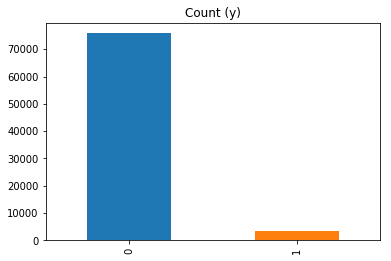

In [38]:
df_base["DEFAULT_FLAG"].value_counts().plot(kind='bar',title='Count (y)')
plt.show()

Mamy 3357 wystąpień stanu default (czyli braku wywiązania się z zobowiązania powyżej 90 dni) <br>
- jest to zjawisko które chcemy modelować **(4,2% całej próby)** <br>
Co oznacza że mamy doczynienia z **niezbalansowaną próba** - użyje oversampling i undersampling

## Problem klas niezbalansowanych

#### 1. Undersampling 
Losowo usuwam obserwację z liczniejszej klasy, uzyskując grupy o tej samej wielkości (wiąże się to z utratą być możne cennych danych dla grupy liczniejszej)

In [39]:
own_random_state = 2

In [40]:
def sample_under(input_data):
    df_count_under_0, df_count_under_1 = input_data["DEFAULT_FLAG"].value_counts()
    df_base_under_0 = input_data[input_data["DEFAULT_FLAG"]==0]
    df_base_under_1 = input_data[input_data["DEFAULT_FLAG"]==1]

    df_base_0_under = df_base_under_0.sample(df_count_under_1, random_state= own_random_state)
    output = pd.concat([df_base_0_under,df_base_under_1],axis=0)
    return output

#### 2. Oversampling 

Sztucznie zwiększam liczność klas typu default_rate=1 poprzez dopróbkowanie obserwacji.<br>
Uzyskuję wyrównanie obu klas, bez utraty informacji (jednak zwiększam licznosć zbioru co zmniejsza optymalizację)

In [41]:
def sample_over(input_data):
    df_count_over_0, df_count_over_1 = input_data["DEFAULT_FLAG"].value_counts()
    df_base_over_0 = input_data[input_data["DEFAULT_FLAG"]==0]
    df_base_over_1 = input_data[input_data["DEFAULT_FLAG"]==1]

    df_base_1_over = df_base_over_1.sample(df_count_over_0, replace=True,random_state = own_random_state)
    output = pd.concat([df_base_over_0,df_base_1_over],axis=0)
    return output


In [42]:
#wykres rozkładu próbki
def wykres_sampling(input_data ):
    print(input_data['DEFAULT_FLAG'].value_counts())
    print(input_data.shape)
    input_data["DEFAULT_FLAG"].value_counts().plot(kind='bar',title='Count (y)',figsize=(10,2))
    return plt.show()

####  3.Ważona funkcja straty 


Zrealizuje na etapie definicji pipline do modelowania 
Cytat z ćwiczeń Przemysław Spurek " Główną przyczyną takiego zachowania modelu jest to, że wartości funkcji straty dla obserwacji z mniej licznej klasy mają proporcjonalnie mniejszy wkład w jej wartość, niż obserwacje z bardziej licznej klasy. Dzięki temu klasyfikator "uczy się", że nie ma sensu dopasowywać się do tych mniej licznych obserwacji, bo zysk z tego będzie niewielki. Możemy więc nadać każdemu punktowi odpowiednią wagę (zależną od klasy) tak, aby zrównoważyło to braki w liczności."

## Wykres korelacji pomiedzy zmiennymi

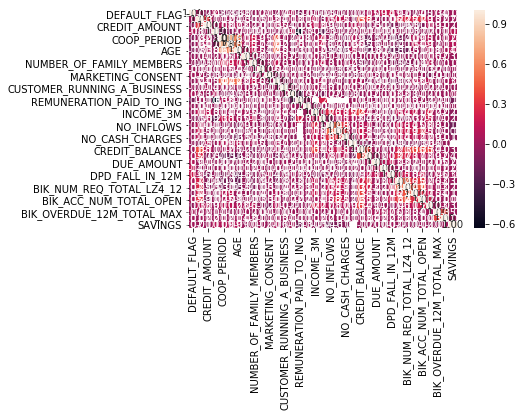

In [43]:
# heatmapa korelacji - nalezy zmniejszyc ilosc zmiennych 
sns.heatmap(df_base.corr(),annot=True, fmt=".2f")
#sns.pairplot(df_base, hue='DEFAULT_FLAG')
plt.show()

### Podział danych na TRAIN i TEST w relacji 30% do 70%

In [44]:
# Wybór danych wsadowych do podziału na train i test 
data_model = df_base.copy()
print(data_model.shape)

(79155, 44)


In [45]:
y = data_model.DEFAULT_FLAG
X = data_model.drop(['DEFAULT_FLAG'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= own_random_state)
print("Size of training set : {} size of test set: {}".format( X_train.shape[0], X_test.shape[0]))


Size of training set : 55408 size of test set: 23747


**1. Implementacja Undersampling**

0    53026
1    2382 
Name: DEFAULT_FLAG, dtype: int64
(55408, 44)


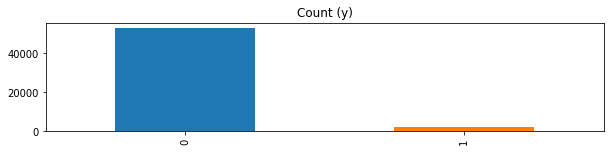

In [46]:
# dodanie zmiennej y w celu dolosowania próbki
samp_under = pd.concat([X_train,y_train],axis=1)
samp_under.shape
#wykres
wykres_sampling(samp_under)

1    2382
0    2382
Name: DEFAULT_FLAG, dtype: int64
(4764, 44)


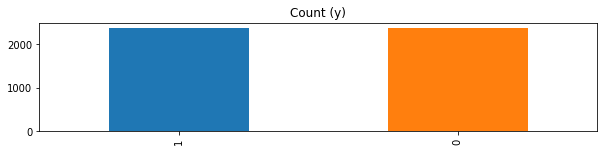

In [47]:
# wykonanie undersampling
data_model_under = sample_under(samp_under)
wykres_sampling(data_model_under)

In [48]:
#ponowne wykluczenie y z zbioru train i utworzenie y_train
y_train_under = data_model_under.DEFAULT_FLAG
X_train_under = data_model_under.drop(['DEFAULT_FLAG'],axis=1)
print("Size of training set Undersampling: {} size of test set: {}".format( X_train_under.shape[0], X_test.shape[0]))

Size of training set Undersampling: 4764 size of test set: 23747


**2. Implementacja Oversampling**

0    53026
1    2382 
Name: DEFAULT_FLAG, dtype: int64
(55408, 44)


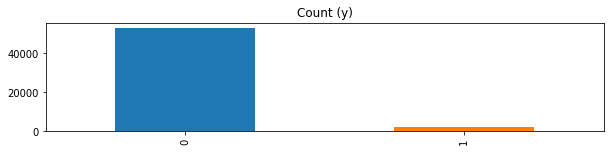

In [49]:
# dodanie zmiennej y w celu dolosowania próbki
samp_over = pd.concat([X_train,y_train],axis=1)
samp_over.shape
#wykres
wykres_sampling(samp_under)

1    53026
0    53026
Name: DEFAULT_FLAG, dtype: int64
(106052, 44)


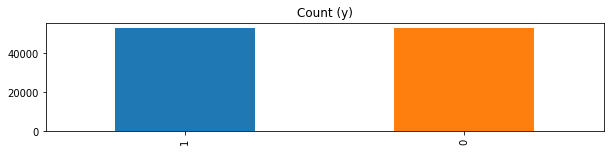

In [50]:
# wykonanie undersampling
data_model_over = sample_over(samp_over)
wykres_sampling(data_model_over)

In [51]:
#ponowne wykluczenie y z zbioru train i utworzenie y_train
y_train_over = data_model_over.DEFAULT_FLAG
X_train_over = data_model_over.drop(['DEFAULT_FLAG'],axis=1)
print("Size of training set Oversampling: {} size of test set: {}".format( X_train_over.shape[0], X_test.shape[0]))

Size of training set Oversampling: 106052 size of test set: 23747


## Implementacja zmiany danych - wybór zmiennych do pipeline

**OneHotEncoder**

Lista zmiennych kategorycznych przeznaczona do użycia OneHotEncodin

In [52]:
col_num_ohe = list()
for x in df_base.select_dtypes(include=['object']).columns:
    col_num_ohe.append(x)

In [53]:
print(col_num_ohe)

['PRODUCT_GROUP', 'AGE_BANDS', 'EDUCATION', 'MARITAL_STATUS', 'OWNERSHIP', 'EMAIL_DOMAIN', 'EMAIL_NAME_SURNAME', 'EMP_TYPE', 'BIK_GRP']


**Simpleoutliersfill**

Wykluczam zmienne dla których kwartyl 1 i kwartyl 3 jest równy 0 (DEFAULT_FLAG (target), DUE_AMOUNT, DPD)

In [54]:
col_num_imp = list()
for x in df_base.select_dtypes(include=['int64','float64']).columns.drop(['DEFAULT_FLAG','DUE_AMOUNT','DPD']):
        col_num_imp.append(x)

## Implementacja zmiany danych - utworzenie prób do modelowania (pipeline)

**1. Zmienne kategoryczne (OneHotEncoder), zmienne numeryczne -Outliers (Simpleoutliersfill), Null (SimpleImputer) oraz StandardScaler**

In [55]:
pipeline_ohe_imp=FeatureUnion([
    ("str"     ,make_pipeline(Selectcol(col_num_ohe), ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True))),
    ("num"     ,make_pipeline(Selectcol(col_num_imp), Simpleoutliersfill(col_num_imp),SimpleImputer(strategy="median"),StandardScaler()))
])

**Próbka undersampling**

In [56]:
X_train_under_ohe_imp = X_train_under.copy()
X_train_under_ohe_imp = pd.DataFrame(pipeline_ohe_imp.fit_transform(X_train_under,y_train_under))

X_test_under_ohe_imp = X_test.copy()
X_test_under_ohe_imp = pd.DataFrame(pipeline_ohe_imp.transform(X_test_under_ohe_imp))
print(X_train_under_ohe_imp.shape)
print(X_test_under_ohe_imp.shape)

C:\Users\hammet\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\hammet\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\hammet\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_in

(4764, 90)
(23747, 90)


**Próbka oversampling**

In [57]:
X_train_over_ohe_imp = X_train_over.copy()
X_train_over_ohe_imp = pd.DataFrame(pipeline_ohe_imp.fit_transform(X_train_over,y_train_over))

X_test_over_ohe_imp = X_test.copy()
X_test_over_ohe_imp = pd.DataFrame(pipeline_ohe_imp.transform(X_test_over_ohe_imp))
print(X_train_over_ohe_imp.shape)
print(X_test_over_ohe_imp.shape)

C:\Users\hammet\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\hammet\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\hammet\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_in

(106052, 91)
(23747, 91)


**Próbka ważona funkcja straty**

In [58]:
X_train_wfs_ohe_imp = X_train.copy()
X_train_wfs_ohe_imp = pd.DataFrame(pipeline_ohe_imp.fit_transform(X_train,y_train))

X_test_wfs_ohe_imp = X_test.copy()
X_test_wfs_ohe_imp = pd.DataFrame(pipeline_ohe_imp.transform(X_test_wfs_ohe_imp))
print(X_train_wfs_ohe_imp.shape)
print(X_test_wfs_ohe_imp.shape)

C:\Users\hammet\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\hammet\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\hammet\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_in

(55408, 91)
(23747, 91)


**2. Zmienne kategoryczne (OneHotEncoder), zmienne numeryczne -Outliers (Simpleoutliersfill), Null (IterativeImputer), oraz StandardScaler**

In [59]:
pipeline_ohe_iti=FeatureUnion([
    ("str"  ,make_pipeline(Selectcol(col_num_ohe),ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True))),
    ("num"  ,make_pipeline(Selectcol(col_num_imp),Simpleoutliersfill(col_num_imp),
    IterativeImputer(random_state=own_random_state, estimator=ExtraTreesRegressor(n_estimators=10, random_state=own_random_state)),StandardScaler()))
])

**Próbka undersampling**

In [60]:
X_train_under_ohe_iti = X_train_under.copy()
X_train_under_ohe_iti = pd.DataFrame(pipeline_ohe_iti.fit_transform(X_train_under,y_train_under))

X_test_under_ohe_iti = X_test.copy()
X_test_under_ohe_iti = pd.DataFrame(pipeline_ohe_iti.transform(X_test_under_ohe_iti))
print(X_train_under_ohe_iti.shape)
print(X_test_under_ohe_iti.shape)

C:\Users\hammet\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\hammet\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\hammet\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_in

(4764, 90)
(23747, 90)


**Próbka oversampling**

In [61]:
X_train_over_ohe_iti = X_train_over.copy()
X_train_over_ohe_iti = pd.DataFrame(pipeline_ohe_iti.fit_transform(X_train_over,y_train_over))

X_test_over_ohe_iti = X_test.copy()
X_test_over_ohe_iti = pd.DataFrame(pipeline_ohe_iti.transform(X_test_over_ohe_iti))
print(X_train_over_ohe_iti.shape)
print(X_test_over_ohe_iti.shape)

C:\Users\hammet\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\hammet\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\hammet\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_in

(106052, 91)
(23747, 91)


**Próbka ważona funkcja straty**

In [62]:
X_train_wfs_ohe_iti = X_train.copy()
X_train_wfs_ohe_iti = pd.DataFrame(pipeline_ohe_iti.fit_transform(X_train,y_train))

X_test_wfs_ohe_iti = X_test.copy()
X_test_wfs_ohe_iti = pd.DataFrame(pipeline_ohe_iti.transform(X_test_wfs_ohe_iti))
print(X_train_wfs_ohe_iti.shape)
print(X_test_wfs_ohe_iti.shape)

C:\Users\hammet\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\hammet\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\hammet\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_in

(55408, 91)
(23747, 91)


**3. Zmienne kategoryczne (Target Encoder), zmienne numeryczne -Outliers (Simpleoutliersfill), Null (IterativeImputer), oraz StandardScaler**

In [63]:
pipeline_tae_iti=FeatureUnion([
    ("str"     ,make_pipeline(Selectcol(col_num_ohe), ce.TargetEncoder(return_df= True))),
    ("num"     ,make_pipeline(Selectcol(col_num_imp), Simpleoutliersfill(col_num_imp),SimpleImputer(strategy="median"),StandardScaler()))
])

**Próbka undersampling**

In [64]:
X_train_under_tae_iti = X_train_under.copy()
X_train_under_tae_iti = pd.DataFrame(pipeline_tae_iti.fit_transform(X_train_under,y_train_under))

X_test_under_tae_iti = X_test.copy()
X_test_under_tae_iti = pd.DataFrame(pipeline_tae_iti.transform(X_test_under_tae_iti))
print(X_train_under_tae_iti.shape)
print(X_test_under_tae_iti.shape)

C:\Users\hammet\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\hammet\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\hammet\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_in

(4764, 33)
(23747, 33)


**Próbka oversampling**

In [65]:
X_train_over_tae_iti = X_train_over.copy()
X_train_over_tae_iti = pd.DataFrame(pipeline_tae_iti.fit_transform(X_train_over,y_train_over))

X_test_over_tae_iti = X_test.copy()
X_test_over_tae_iti = pd.DataFrame(pipeline_tae_iti.transform(X_test_over_tae_iti))
print(X_train_over_tae_iti.shape)
print(X_test_over_tae_iti.shape)

C:\Users\hammet\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\hammet\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\hammet\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_in

(106052, 33)
(23747, 33)


**Próbka ważona funkcja straty**

In [66]:
X_train_wfs_tae_iti = X_train.copy()
X_train_wfs_tae_iti = pd.DataFrame(pipeline_tae_iti.fit_transform(X_train,y_train))

X_test_wfs_tae_iti = X_test.copy()
X_test_wfs_tae_iti = pd.DataFrame(pipeline_tae_iti.transform(X_test_wfs_tae_iti))
print(X_train_wfs_tae_iti.shape)
print(X_test_wfs_tae_iti.shape)

C:\Users\hammet\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\hammet\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\hammet\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_in

(55408, 33)
(23747, 33)



# MODELOWANIE

**Próbki UnderSampling**

In [83]:
desc    =["OHE-SimpleImputer-Undersampling", "OHE-IterativeImputer-Undersampling", "TAE-IterativeImputer-Undersampling" ]

X_treningowy = [X_train_under_ohe_imp, X_train_under_ohe_iti, X_train_under_tae_iti]
X_testowy    = [X_test_under_ohe_imp , X_test_under_ohe_iti , X_test_under_tae_iti ]

model_imp = [
    [("under", LogisticRegression())],
    [("under", GaussianNB())],
    [("under", RandomForestClassifier())],
    [("under", XGBClassifier())]
    ]
    
model_desc = [
               "LogisticRegression",
                "GaussianNB",
                "RandomForest",
                "XGB"
            ]

y_treningowy = [y_train_under, y_train_under, y_train_under]
y_testowy    = [y_test, y_test, y_test]

parametry    = [
                {"under__C":[0.001,0.01,0.1,1,10,100],
                 "under__penalty":["l1","l2"]},
                {},         
                {"under__criterion":["gini","entropy"],"under__n_estimators":[20,50,100], "under__min_samples_leaf":[50,250],
                 "under__min_samples_split":[100,400]},
                 {"under__min_child_weight": [3, 10],"under__gamma": [0.5, 2, 5],"under__subsample": [0.6, 1.0],
                 "under__colsample_bytree": [0.6,  1.0],
                 "under__max_depth": [3, 5] }
               ]

output_under_fin = list()
for probka, X_treningowy, X_testowy, y_treningowy, y_testowy in zip(desc, X_treningowy, X_testowy, y_treningowy, y_testowy):
    print(f"Próbka: {probka}")
    acc_train = list()
    acc_test = list()
    auc_train = list()
    auc_test = list()
    pre_train = list()
    pre_test = list()
    rec_train = list()
    rec_test = list()
    f1_train = list()
    f1_test = list()
    nazwa_modelu = list() 
    for przeb, model, param in zip(model_desc, model_imp, parametry ):
        print(f"Model: {przeb}")
        pipe=Pipeline(model)
        best_model=GridSearchCV(pipe, param, cv=5, scoring="roc_auc", n_jobs=-1)
        best_model.fit(X_treningowy,y_treningowy)
        print(best_model.best_estimator_)
        acc_train_p = accuracy_score(y_pred = best_model.best_estimator_.predict(X_treningowy),y_true=y_treningowy)
        acc_test_p  = accuracy_score(y_pred = best_model.best_estimator_.predict(X_testowy),y_true=y_testowy)
        auc_train_p = roc_auc_score(y_score = best_model.best_estimator_.predict_proba(X_treningowy)[:,1],y_true=y_treningowy)
        auc_test_p  = roc_auc_score(y_score = best_model.best_estimator_.predict_proba(X_testowy)[:,1],y_true=y_testowy)
        pre_train_p = precision_score(y_pred = best_model.best_estimator_.predict(X_treningowy),y_true=y_treningowy)
        pre_test_p  = precision_score(y_pred = best_model.best_estimator_.predict(X_testowy),y_true=y_testowy)
        rec_train_p = recall_score(y_pred = best_model.best_estimator_.predict(X_treningowy),y_true=y_treningowy)
        rec_test_p  = recall_score(y_pred = best_model.best_estimator_.predict(X_testowy),y_true=y_testowy)
        f1_train_p  = f1_score(y_pred = best_model.best_estimator_.predict(X_treningowy),y_true=y_treningowy)
        f1_test_p   = f1_score(y_pred = best_model.best_estimator_.predict(X_testowy),y_true=y_testowy)
        
        acc_train.append(acc_train_p)
        acc_test.append(acc_test_p)
        auc_train.append(auc_train_p)
        auc_test.append(auc_test_p)
        pre_train.append(pre_train_p)
        pre_test.append(pre_test_p)
        rec_train.append(rec_train_p)
        rec_test.append(rec_test_p)
        f1_train.append(f1_train_p)
        f1_test.append(f1_test_p)
        nazwa_modelu.append(przeb) 
                                          
        output_under = dict({"Accuracy_train":acc_train,"Accuracy_test":acc_test,
                             "AUC_train":auc_train,"AUC_test":auc_test,
                             "Precision_train":pre_train,"Precision_test":pre_test,
                             "Recall_train":rec_train,"Recall_test":rec_test,
                             "F1_train":f1_train,"F1_test":f1_test,
                             "Próbka":probka},index=nazwa_modelu)
    output_under_fin.append(output_under)      

Próbka: OHE-SimpleImputer-Undersampling
Model: LogisticRegression


C:\Users\hammet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('under',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
Model: GaussianNB
Pipeline(memory=None,
         steps=[('under', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)
Model: RandomForest
Pipeline(memory=None,
         steps=[('under',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='entropy', max_depth=None,
                                        max_features='auto',
                        

C:\Users\hammet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('under',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
Model: GaussianNB
Pipeline(memory=None,
         steps=[('under', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)
Model: RandomForest
Pipeline(memory=None,
         steps=[('under',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                           

C:\Users\hammet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('under',
                 LogisticRegression(C=100, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
Model: GaussianNB
Pipeline(memory=None,
         steps=[('under', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)
Model: RandomForest
Pipeline(memory=None,
         steps=[('under',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='entropy', max_depth=None,
                                        max_features='auto',
                        

**Próbka Oversampling**

In [84]:
desc    =["OHE-SimpleImputer-Oversampling", "OHE-IterativeImputer-Oversampling", "TAE-IterativeImputer-Oversampling" ]

X_treningowy = [X_train_over_ohe_imp, X_train_over_ohe_iti, X_train_over_tae_iti]
X_testowy    = [X_test_over_ohe_imp , X_test_over_ohe_iti , X_test_over_tae_iti ]

model_imp = [
    [("over", LogisticRegression())],
    [("over", GaussianNB())],
    [("over", RandomForestClassifier())],
    [("over", XGBClassifier())]
    ]
    
model_desc = [
               "LogisticRegression",
                "GaussianNB",
                "RandomForest",
                "XGB"
            ]

y_treningowy = [y_train_over, y_train_over, y_train_over]
y_testowy    = [y_test, y_test, y_test]

parametry    = [
                {"over__C":[0.001,0.01,0.1,1,10,100],
                 "over__penalty":["l1","l2"]},
                {},         
                {"over__criterion":["gini","entropy"],"over__n_estimators":[20,50,100], "over__min_samples_leaf":[50,250],
                 "over__min_samples_split":[100,400]},
                 {"over__min_child_weight": [3, 10],"over__gamma": [0.5, 2, 5],"over__subsample": [0.6, 1.0],
                 "over__colsample_bytree": [0.6,  1.0],
                 "over__max_depth": [3, 5] }
               ]

output_over_fin = list()
for probka, X_treningowy, X_testowy, y_treningowy, y_testowy in zip(desc, X_treningowy, X_testowy, y_treningowy, y_testowy):
    print(f"Próbka: {probka}")
    acc_train = list()
    acc_test = list()
    auc_train = list()
    auc_test = list()
    pre_train = list()
    pre_test = list()
    rec_train = list()
    rec_test = list()
    f1_train = list()
    f1_test = list()   
    nazwa_modelu = list() 
    for przeb, model, param in zip(model_desc, model_imp, parametry ):
        print(f"Model: {przeb}")
        pipe=Pipeline(model)
        best_model=GridSearchCV(pipe, param, cv=5, scoring="roc_auc", n_jobs=-1)
        best_model.fit(X_treningowy,y_treningowy)
        print(best_model.best_estimator_)
        acc_train_p = accuracy_score(y_pred = best_model.best_estimator_.predict(X_treningowy),y_true=y_treningowy)
        acc_test_p  = accuracy_score(y_pred = best_model.best_estimator_.predict(X_testowy),y_true=y_testowy)
        auc_train_p = roc_auc_score(y_score = best_model.best_estimator_.predict_proba(X_treningowy)[:,1],y_true=y_treningowy)
        auc_test_p  = roc_auc_score(y_score = best_model.best_estimator_.predict_proba(X_testowy)[:,1],y_true=y_testowy)
        pre_train_p = precision_score(y_pred = best_model.best_estimator_.predict(X_treningowy),y_true=y_treningowy)
        pre_test_p  = precision_score(y_pred = best_model.best_estimator_.predict(X_testowy),y_true=y_testowy)
        rec_train_p = recall_score(y_pred = best_model.best_estimator_.predict(X_treningowy),y_true=y_treningowy)
        rec_test_p  = recall_score(y_pred = best_model.best_estimator_.predict(X_testowy),y_true=y_testowy)
        f1_train_p  = f1_score(y_pred = best_model.best_estimator_.predict(X_treningowy),y_true=y_treningowy)
        f1_test_p   = f1_score(y_pred = best_model.best_estimator_.predict(X_testowy),y_true=y_testowy)
        
        acc_train.append(acc_train_p)
        acc_test.append(acc_test_p)
        auc_train.append(auc_train_p)
        auc_test.append(auc_test_p)
        pre_train.append(pre_train_p)
        pre_test.append(pre_test_p)
        rec_train.append(rec_train_p)
        rec_test.append(rec_test_p)
        f1_train.append(f1_train_p)
        f1_test.append(f1_test_p)
        nazwa_modelu.append(przeb) 
        
        output_over =  dict({"Accuracy_train":acc_train,"Accuracy_test":acc_test,
                             "AUC_train":auc_train,"AUC_test":auc_test,
                             "Precision_train":pre_train,"Precision_test":pre_test,
                             "Recall_train":rec_train,"Recall_test":rec_test,
                             "F1_train":f1_train,"F1_test":f1_test,
                             "Próbka":probka},index=nazwa_modelu)
    output_over_fin.append(output_over)    

Próbka: OHE-SimpleImputer-Oversampling
Model: LogisticRegression


C:\Users\hammet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('over',
                 LogisticRegression(C=100, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
Model: GaussianNB
Pipeline(memory=None,
         steps=[('over', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)
Model: RandomForest
Pipeline(memory=None,
         steps=[('over',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='entropy', max_depth=None,
                                        max_features='auto',
                           

C:\Users\hammet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('over',
                 LogisticRegression(C=100, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
Model: GaussianNB
Pipeline(memory=None,
         steps=[('over', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)
Model: RandomForest
Pipeline(memory=None,
         steps=[('over',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='entropy', max_depth=None,
                                        max_features='auto',
                           

C:\Users\hammet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('over',
                 LogisticRegression(C=100, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
Model: GaussianNB
Pipeline(memory=None,
         steps=[('over', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)
Model: RandomForest
Pipeline(memory=None,
         steps=[('over',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='entropy', max_depth=None,
                                        max_features='auto',
                           

**Próbka Ważona funkcja straty**

In [89]:
desc    =["OHE-SimpleImputer-Wazona_funkcja_straty", "OHE-IterativeImputer-Wazona_funkcja_straty", "TAE-IterativeImputer-Wazona_funkcja_straty" ]

X_treningowy = [X_train_wfs_ohe_imp, X_train_wfs_ohe_iti, X_train_wfs_tae_iti]
X_testowy    = [X_test_wfs_ohe_imp , X_test_wfs_ohe_iti , X_test_wfs_tae_iti ]

model_imp = [
    [("wfs", LogisticRegression())],
    [("wfs", GaussianNB())],
    [("wfs", RandomForestClassifier())],
    [("wfs", XGBClassifier())]
    ]
    
model_desc = [
               "LogisticRegression",
                "GaussianNB",
                "RandomForest",
                "XGB"
            ]

y_treningowy = [y_train, y_train, y_train]
y_testowy    = [y_test, y_test, y_test]

parametry    = [
                {"wfs__C":[0.001,0.01,0.1,1,10,100],
                 "wfs__class_weight":[{0:1,1:10},{0:1,1:20},{0:1,1:25},{0:1,1:40}] ,
                 "wfs__penalty":["l1","l2"]},
                {},         
                {"wfs__criterion":["gini","entropy"],"wfs__n_estimators":[20,50,100], "wfs__min_samples_leaf":[50,250],
                 "wfs__min_samples_split":[100,400],
                 "wfs__class_weight":[{0:1,1:10},{0:1,1:20},{0:1,1:25},{0:1,1:40}]},
                 {"wfs__min_child_weight": [3, 10],"wfs__gamma": [0.5, 2, 5],"wfs__subsample": [0.6, 1.0],
                 "wfs__colsample_bytree": [0.6,  1.0],
                 "wfs__scale_pos_weight":[10,20,25,40] ,
                 "wfs__max_depth": [3, 5] }
                 ]

output_wfs_fin = list()
for probka, X_treningowy, X_testowy, y_treningowy, y_testowy in zip(desc, X_treningowy, X_testowy, y_treningowy, y_testowy):
    print(f"Próbka: {probka}")
    acc_train = list()
    acc_test = list()
    auc_train = list()
    auc_test = list()
    pre_train = list()
    pre_test = list()
    rec_train = list()
    rec_test = list()
    f1_train = list()
    f1_test = list()
    nazwa_modelu = list()
    for przeb, model, param in zip(model_desc, model_imp, parametry ):
        print(f"Model: {przeb}")
        pipe=Pipeline(model)
        best_model=GridSearchCV(pipe, param, cv=5, scoring="roc_auc", n_jobs=-1)
        best_model.fit(X_treningowy,y_treningowy)
        print(best_model.best_estimator_)
        acc_train_p = accuracy_score(y_pred = best_model.best_estimator_.predict(X_treningowy),y_true=y_treningowy)
        acc_test_p  = accuracy_score(y_pred = best_model.best_estimator_.predict(X_testowy),y_true=y_testowy)
        auc_train_p = roc_auc_score(y_score = best_model.best_estimator_.predict_proba(X_treningowy)[:,1],y_true=y_treningowy)
        auc_test_p  = roc_auc_score(y_score = best_model.best_estimator_.predict_proba(X_testowy)[:,1],y_true=y_testowy)
        pre_train_p = precision_score(y_pred = best_model.best_estimator_.predict(X_treningowy),y_true=y_treningowy)
        pre_test_p  = precision_score(y_pred = best_model.best_estimator_.predict(X_testowy),y_true=y_testowy)
        rec_train_p = recall_score(y_pred = best_model.best_estimator_.predict(X_treningowy),y_true=y_treningowy)
        rec_test_p  = recall_score(y_pred = best_model.best_estimator_.predict(X_testowy),y_true=y_testowy)
        f1_train_p  = f1_score(y_pred = best_model.best_estimator_.predict(X_treningowy),y_true=y_treningowy)
        f1_test_p   = f1_score(y_pred = best_model.best_estimator_.predict(X_testowy),y_true=y_testowy)
           
        acc_train.append(acc_train_p)
        acc_test.append(acc_test_p)
        auc_train.append(auc_train_p)
        auc_test.append(auc_test_p)
        pre_train.append(pre_train_p)
        pre_test.append(pre_test_p)
        rec_train.append(rec_train_p)
        rec_test.append(rec_test_p)
        f1_train.append(f1_train_p)
        f1_test.append(f1_test_p)
        nazwa_modelu.append(przeb) 
        output_wfs =  dict({"Accuracy_train":acc_train,"Accuracy_test":acc_test,
                             "AUC_train":auc_train,"AUC_test":auc_test,
                             "Precision_train":pre_train,"Precision_test":pre_test,
                             "Recall_train":rec_train,"Recall_test":rec_test,
                             "F1_train":f1_train,"F1_test":f1_test,
                             "Próbka":probka},index=nazwa_modelu)
    output_wfs_fin.append(output_wfs)    

Próbka: OHE-SimpleImputer-Wazona_funkcja_straty
Model: LogisticRegression


C:\Users\hammet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('wfs',
                 LogisticRegression(C=0.01, class_weight={0: 1, 1: 10},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2',
                                    random_state=None, solver='warn',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)
Model: GaussianNB
Pipeline(memory=None,
         steps=[('wfs', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)
Model: RandomForest
Pipeline(memory=None,
         steps=[('wfs',
                 RandomForestClassifier(bootstrap=True,
                                        class_weight={0: 1, 1: 20},
                                        criterion='entropy', max_depth=None,
                                

C:\Users\hammet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('wfs',
                 LogisticRegression(C=0.01, class_weight={0: 1, 1: 10},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2',
                                    random_state=None, solver='warn',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)
Model: GaussianNB
Pipeline(memory=None,
         steps=[('wfs', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)
Model: RandomForest
Pipeline(memory=None,
         steps=[('wfs',
                 RandomForestClassifier(bootstrap=True,
                                        class_weight={0: 1, 1: 10},
                                        criterion='entropy', max_depth=None,
                                

C:\Users\hammet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('wfs',
                 LogisticRegression(C=100, class_weight={0: 1, 1: 10},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2',
                                    random_state=None, solver='warn',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)
Model: GaussianNB
Pipeline(memory=None,
         steps=[('wfs', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)
Model: RandomForest
Pipeline(memory=None,
         steps=[('wfs',
                 RandomForestClassifier(bootstrap=True,
                                        class_weight={0: 1, 1: 20},
                                        criterion='entropy', max_depth=None,
                                 

### Wizualizacja wyników w tablicy

### Zbiorczy dataframe z wszystkimi wynikami modelowania

In [90]:
wyniki = pd.concat([pd.DataFrame(output_under_fin[0]), pd.DataFrame(output_under_fin[1]),pd.DataFrame(output_under_fin[2]),
    pd.DataFrame(output_over_fin[0]),pd.DataFrame(output_over_fin[1]) , pd.DataFrame(output_over_fin[2]),
    pd.DataFrame(output_wfs_fin[0])  , pd.DataFrame(output_wfs_fin[1])  , pd.DataFrame(output_wfs_fin[2])],ignore_index= True)
wyniki.reset_index()
wyniki.set_index('index',inplace=True)
wyniki_round = wyniki.round(3)
wyniki_round

,Accuracy_train,Accuracy_test,AUC_train,AUC_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_train,F1_test,Próbka
index,,,,,,,,,,,
LogisticRegression,0.75,0.73,0.83,0.81,0.74,0.10,0.77,0.74,0.75,0.18,OHE-SimpleImputer-Undersampling
GaussianNB,0.67,0.66,0.72,0.70,0.67,0.08,0.68,0.66,0.68,0.14,OHE-SimpleImputer-Undersampling
RandomForest,0.78,0.70,0.85,0.82,0.76,0.10,0.81,0.77,0.78,0.18,OHE-SimpleImputer-Undersampling
XGB,0.88,0.75,0.96,0.84,0.88,0.12,0.90,0.79,0.89,0.20,OHE-SimpleImputer-Undersampling
LogisticRegression,0.75,0.73,0.83,0.81,0.74,0.11,0.77,0.75,0.76,0.18,OHE-IterativeImputer-Undersampling
GaussianNB,0.67,0.66,0.72,0.70,0.67,0.08,0.68,0.66,0.68,0.14,OHE-IterativeImputer-Undersampling
RandomForest,0.77,0.69,0.85,0.81,0.75,0.09,0.81,0.77,0.78,0.17,OHE-IterativeImputer-Undersampling
XGB,0.87,0.74,0.95,0.84,0.86,0.12,0.87,0.79,0.87,0.20,OHE-IterativeImputer-Undersampling
LogisticRegression,0.74,0.73,0.82,0.81,0.74,0.10,0.76,0.74,0.75,0.18,TAE-IterativeImputer-Undersampling


## Wyniki

W celu polepszenia wyszukania najlepszych wyników używam dodatków do wizualizacji
https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

Sortuje tablice z wynikami według użytego modelu oraz najlepszego wyniku AUC (Area Under ROC Curve) dla próbki testowej

In [92]:
wyniki_sns = wyniki_round.copy()
wyniki_sns.sort_values(by=['index','AUC_test'],ascending=[True, False],inplace= True)
wyniki_sns.reset_index(inplace= True)
cm = sns.light_palette("green", as_cmap=True)
wyniki_sns = wyniki_sns.style.background_gradient(cmap=cm)
wyniki_sns

,index,Accuracy_train,Accuracy_test,AUC_train,AUC_test,Precision_train,Precision_test,Recall_train,Recall_test,F1_train,F1_test,Próbka
0,GaussianNB,0.857,0.859,0.769,0.761,0.142,0.138,0.458,0.467,0.216,0.214,TAE-IterativeImputer-Wazona_funkcja_straty
1,GaussianNB,0.702,0.666,0.766,0.756,0.689,0.085,0.735,0.729,0.711,0.152,TAE-IterativeImputer-Undersampling
2,GaussianNB,0.699,0.664,0.763,0.755,0.686,0.084,0.733,0.726,0.709,0.151,TAE-IterativeImputer-Oversampling
3,GaussianNB,0.435,0.427,0.725,0.712,0.061,0.057,0.849,0.83,0.115,0.106,OHE-SimpleImputer-Wazona_funkcja_straty
4,GaussianNB,0.431,0.422,0.724,0.711,0.061,0.057,0.847,0.837,0.113,0.106,OHE-IterativeImputer-Wazona_funkcja_straty
5,GaussianNB,0.597,0.324,0.718,0.706,0.561,0.051,0.892,0.879,0.689,0.096,OHE-SimpleImputer-Oversampling
6,GaussianNB,0.597,0.323,0.719,0.706,0.561,0.051,0.892,0.875,0.689,0.096,OHE-IterativeImputer-Oversampling
7,GaussianNB,0.674,0.661,0.723,0.703,0.673,0.076,0.678,0.655,0.675,0.137,OHE-SimpleImputer-Undersampling
8,GaussianNB,0.674,0.66,0.722,0.702,0.674,0.077,0.675,0.659,0.675,0.137,OHE-IterativeImputer-Undersampling
9,LogisticRegression,0.868,0.868,0.826,0.818,0.168,0.161,0.525,0.525,0.254,0.246,OHE-SimpleImputer-Wazona_funkcja_straty


**Gaussian NaiveBayes**
Najgorsze wyniki uzyskałem używając modelu **Gaussian NaiveBayes** (porównując AUC na zbiorze testowym).
Na wszystkich próbkach AUC dla tego modelu wynosi od 0.70 do 0.76, przy sporej róznicy na Accury od 0.66 do 0.86. Precission nie przekracza 0.14, recall waha sie od 0.47 do 0.88, F1 od 0.14 do 0.21.
Warto zauwżyc że najlepsze wyniki uzyskano dla próbek,w których zastosowałem dla zmiennych kategorycznych metody **Target Encoder** oraz dla wartości NULL **Iterative Imputer**, co ciekawe kwestia Undersampling i Oversampling wydaje się mniej istotna dla wyników tego modelu (choć widać wyrażnie że użycie ważonej funkcji straty wpłyneło wyrażnie na F1 = 0.21)

**Regresja logistyczna**
Porównując wyniki w pierwszej kolejności po AUC na zbiorze testowym można zauważyć, że na wszystkich próbkach dla tego modelu wartości wahają sie od  0.81 do 0.82 (nieistotnie), przy jednoczesnej zauważalnej zmianie dla Accuracy (0.75 do 0.87)
Precission w zakresie od 0.11 do 0.16, recall waha sie od 0.52 do 0.75, F1 od 0.18 do 0.25.
Najlepszymi modelemi wydają sie te wygenerowane na próbkach przy użyciu **One Hot Encoding** oraz **Iterative Imputer** z zastosowaniem ważenia niezabalansowanej próbki.

**Random Forest**
Na próbkach testowych wartości miary oceny modelu AUC wahają sie od  0.81 do 0.86, przy jednoczesnej zmianie dla Accuracy (0.77 do 0.95.). Precission nie przekracza od 0.01 do 0.21, recall waha sie od 0.62 do 0.77, F1 od 0.17 do 0.33.
Najlepszymi modelemi wydają sie te wygenerowane na próbkach z Oversamplingiem.
Model charatkteryzuje się dużym Overfittingiem (test vs. train), który starałem się zmniejszyć zmieniając parametry sample leaf i split 

**XGB Boost**
Dla miary AUC na zbiorze testowym mamy praktycznie nie istotną różnice (0.84 do 0.86) przy jednoczesnej zmianie miary Accuracy od 0.74 do 0.91. Jeszcze większy rozrzut dla wyników miar możemy zauważyc dla Precission (0.12 do 0.73) oraz Recall (0.53 do 0.79) i F1 (0.20 do 0.32). 
Najlepszymi modelami XGB wydają sie sumarycznie te zbudowane w próbki z ważoną funkcją straty (choć różnice nie wydają się być kluczowe dla wyników modeli).
Dodatkowo możemy zaobserwować Overfitting, patrząc na różnice w dopasowaniu modelu na zbiorze treningowym vs. testowym
